In [1]:
## Setup and Data Loading

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import os

In [2]:
# Create output directory for visualizations
os.makedirs('report_figures', exist_ok=True)

# Set plot style for publication-quality graphics
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.3)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'serif'

# Read the data
print("Loading data...")
df = pd.read_excel('../../stat/raw_data.xlsx')
print(f"Data loaded. Shape: {df.shape}")

# Display the first few rows to understand the data structure
df.head()



Loading data...
Data loaded. Shape: (39386, 12)


task        dataset metric  epoch      duration  accuracy  \
0  img-classification  celeba-gender    acc      1  4.711268e+10  0.967739   
1  img-classification  celeba-gender    acc      1  4.415546e+10  0.964432   
2  img-classification  celeba-gender    acc      1  3.954598e+11  0.963931   
3  img-classification  celeba-gender    acc      1  1.023431e+11  0.962429   
4  img-classification  celeba-gender    acc      1  1.648104e+11  0.949354   

       nn  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10         Unnamed: 11  
0  AirNet         NaN         NaN         NaN          NaN  Accuracy vs Epochs  
1  AirNet         NaN         NaN         NaN          NaN                 NaN  
2  AirNet         NaN         NaN         NaN          NaN                 NaN  
3  AirNet         NaN         NaN         NaN          NaN                 NaN  
4  AirNet         NaN         NaN         NaN          NaN                 NaN

In [3]:
## Data Filtering and Preparation

# Filter for relevant models and datasets
relevant_models = [
    'AirNet', 'AirNext', 'BagNet', 'DarkNet', 'Diffuser', 'DPN68', 'DPN131', 'DPN107', 'FractalNet', 'ICNet'
]

relevant_datasets = [
    'celeba-gender', 'cifar-10', 'cifar-100', 'imagenette', 'mnist', 'places365', 'svhn'
]
all_datasets = df['dataset'].unique()
print(f"All unique datasets: {all_datasets}")

filtered_df = df[(df['nn'].isin(relevant_models)) & (df['dataset'].isin(relevant_datasets))]
filtered_df['duration_seconds'] = filtered_df['duration'] / 1e9
print(f"Filtered data shape: {filtered_df.shape}")

# Define color palette for consistent colors across visualizations
model_colors = dict(zip(relevant_models, sns.color_palette("tab10", len(relevant_models))))

# Look at the filtered data
filtered_df.head()


All unique datasets: ['celeba-gender' 'cifar-10' 'cifar-100' 'imagenette' 'mnist' 'places365'
 'svhn' 'coco']
Filtered data shape: (9399, 13)


C:\Users\yashk\AppData\Local\Temp\ipykernel_4192\782565385.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['duration_seconds'] = filtered_df['duration'] / 1e9


task        dataset metric  epoch      duration  accuracy  \
0  img-classification  celeba-gender    acc      1  4.711268e+10  0.967739   
1  img-classification  celeba-gender    acc      1  4.415546e+10  0.964432   
2  img-classification  celeba-gender    acc      1  3.954598e+11  0.963931   
3  img-classification  celeba-gender    acc      1  1.023431e+11  0.962429   
4  img-classification  celeba-gender    acc      1  1.648104e+11  0.949354   

       nn  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  \
0  AirNet         NaN         NaN         NaN          NaN   
1  AirNet         NaN         NaN         NaN          NaN   
2  AirNet         NaN         NaN         NaN          NaN   
3  AirNet         NaN         NaN         NaN          NaN   
4  AirNet         NaN         NaN         NaN          NaN   

          Unnamed: 11  duration_seconds  
0  Accuracy vs Epochs         47.112679  
1                 NaN         44.155458  
2                 NaN        395.459753  
3                 NaN        102.343140  
4                 NaN        164.810424

Creating performance overview visualization...


C:\Users\yashk\AppData\Local\Temp\ipykernel_4192\167274391.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_accuracy.index, y=model_accuracy.values, palette=[model_colors[m] for m in model_accuracy.index])


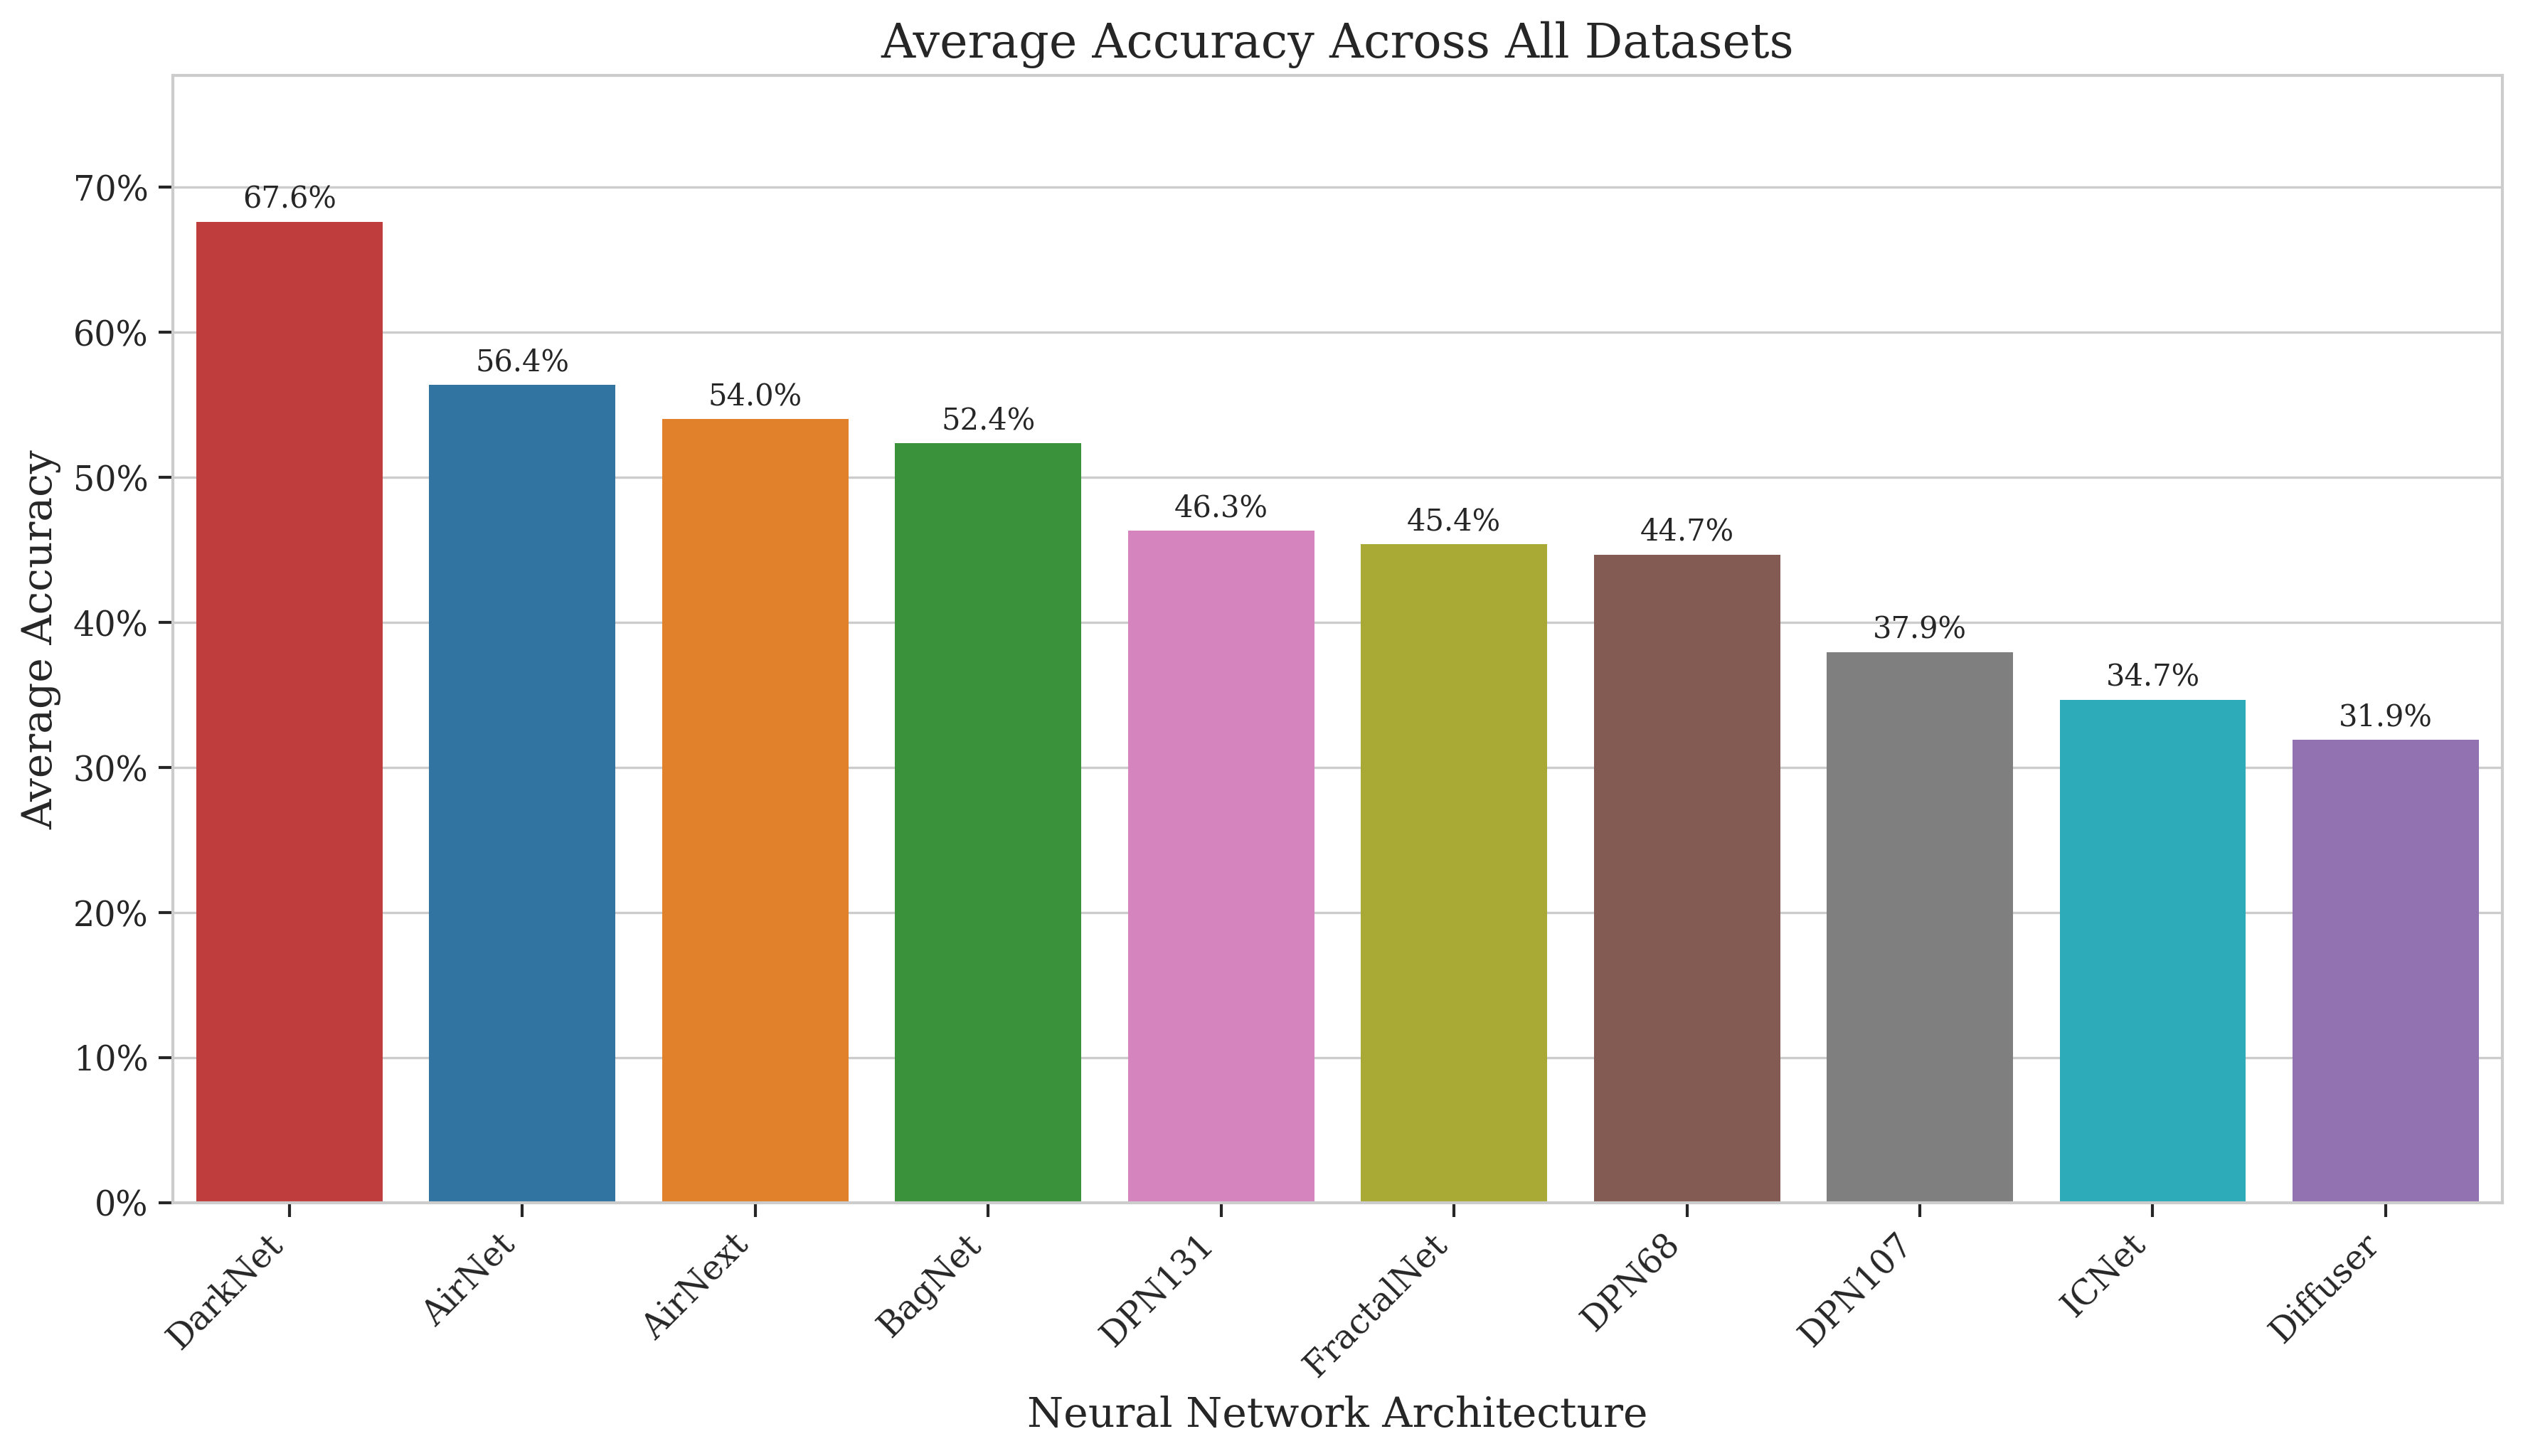

In [4]:
## Visualization 1: Overall Performance Comparison

def create_performance_overview():
    print("Creating performance overview visualization...")
    model_accuracy = filtered_df.groupby('nn')['accuracy'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(x=model_accuracy.index, y=model_accuracy.values, palette=[model_colors[m] for m in model_accuracy.index])
    
    plt.title('Average Accuracy Across All Datasets', fontsize=16)
    plt.xlabel('Neural Network Architecture', fontsize=14)
    plt.ylabel('Average Accuracy', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage formatting to y-axis
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # Add value labels
    for i, v in enumerate(model_accuracy.values):
        ax.text(i, v + 0.01, f"{v:.1%}", ha='center', fontsize=10)
    
    plt.ylim(0, max(model_accuracy.values) * 1.15)  # Add some space for labels
    plt.tight_layout()
    plt.savefig('report_figures/overall_performance.png')
    
    # Display the plot in the notebook
    plt.show()

# Run the function to create and display the visualization
create_performance_overview()

Creating dataset performance heatmap...


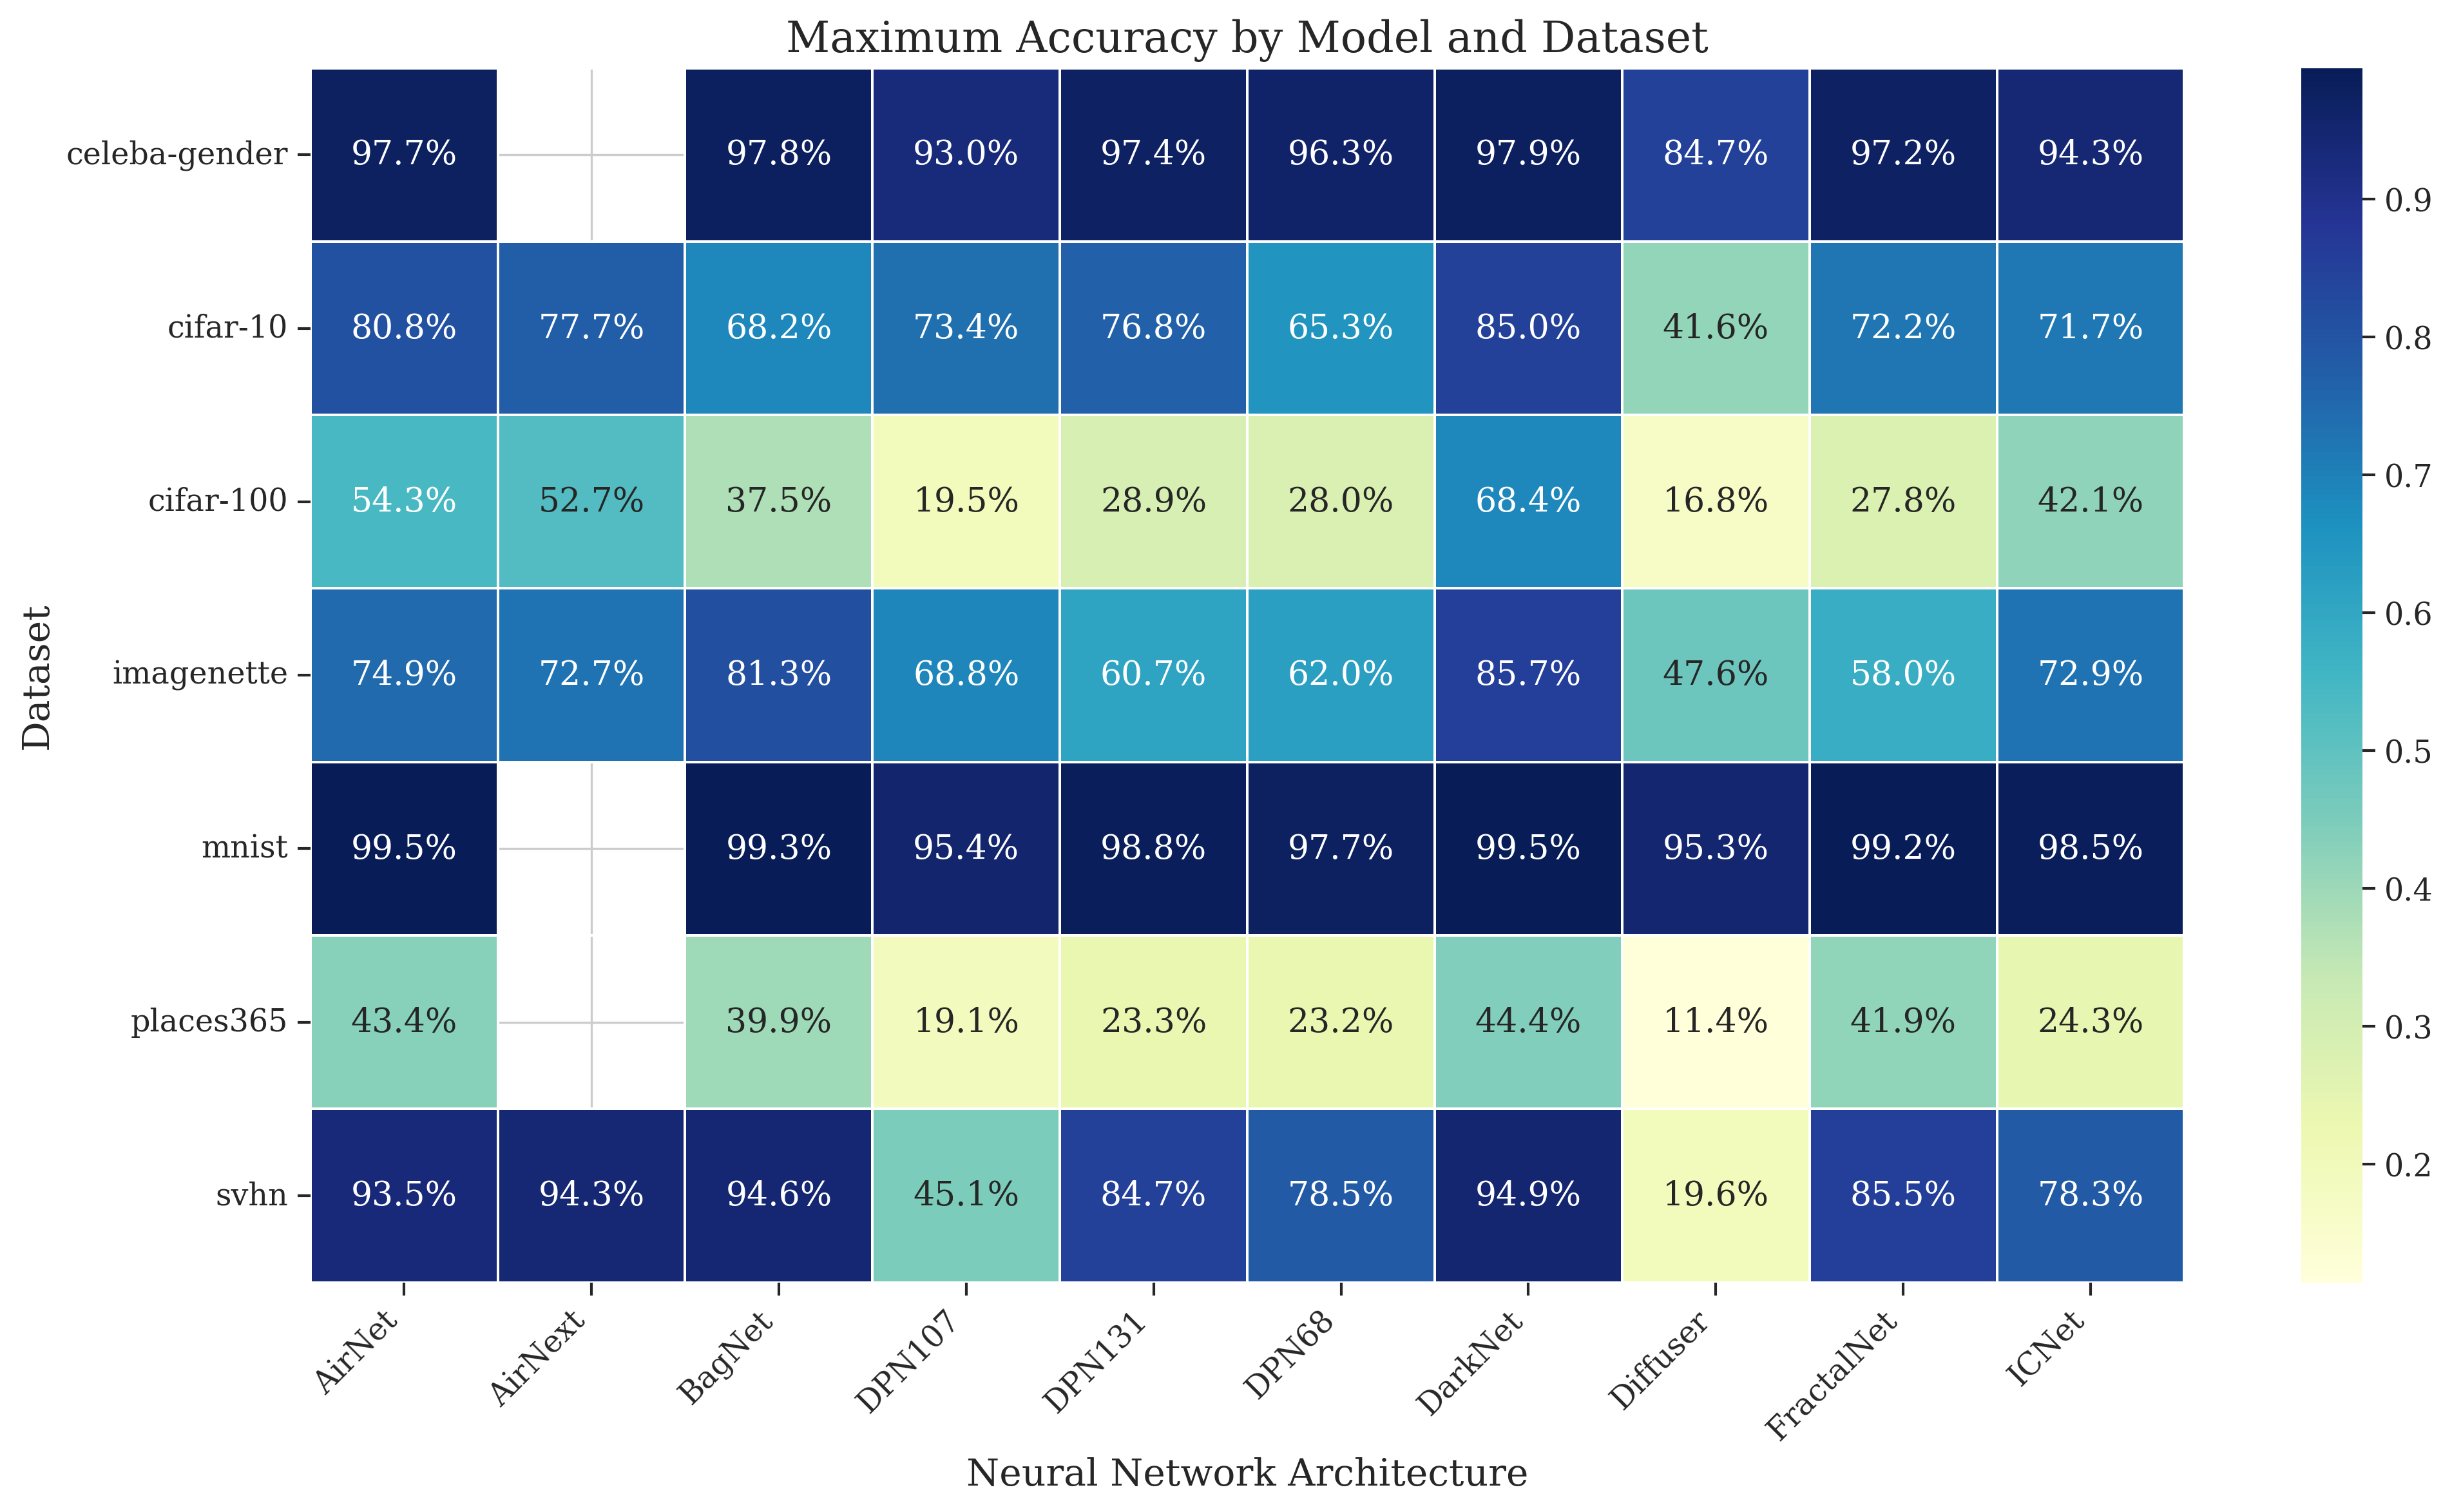

In [5]:
## Visualization 2: Performance by Dataset - Heatmap

def create_dataset_heatmap():
    print("Creating dataset performance heatmap...")
    pivot_data = filtered_df.pivot_table(
        index='dataset', 
        columns='nn', 
        values='accuracy', 
        aggfunc='max'
    )
    
    plt.figure(figsize=(14, 8))
    ax = sns.heatmap(pivot_data, annot=True, fmt='.1%', cmap='YlGnBu', linewidths=0.5)
    
    plt.title('Maximum Accuracy by Model and Dataset', fontsize=16)
    plt.xlabel('Neural Network Architecture', fontsize=14)
    plt.ylabel('Dataset', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig('report_figures/dataset_heatmap.png')
    
    # Display the plot in the notebook
    plt.show()

# Run the function to create and display the visualization
create_dataset_heatmap()

Creating training efficiency visualization...


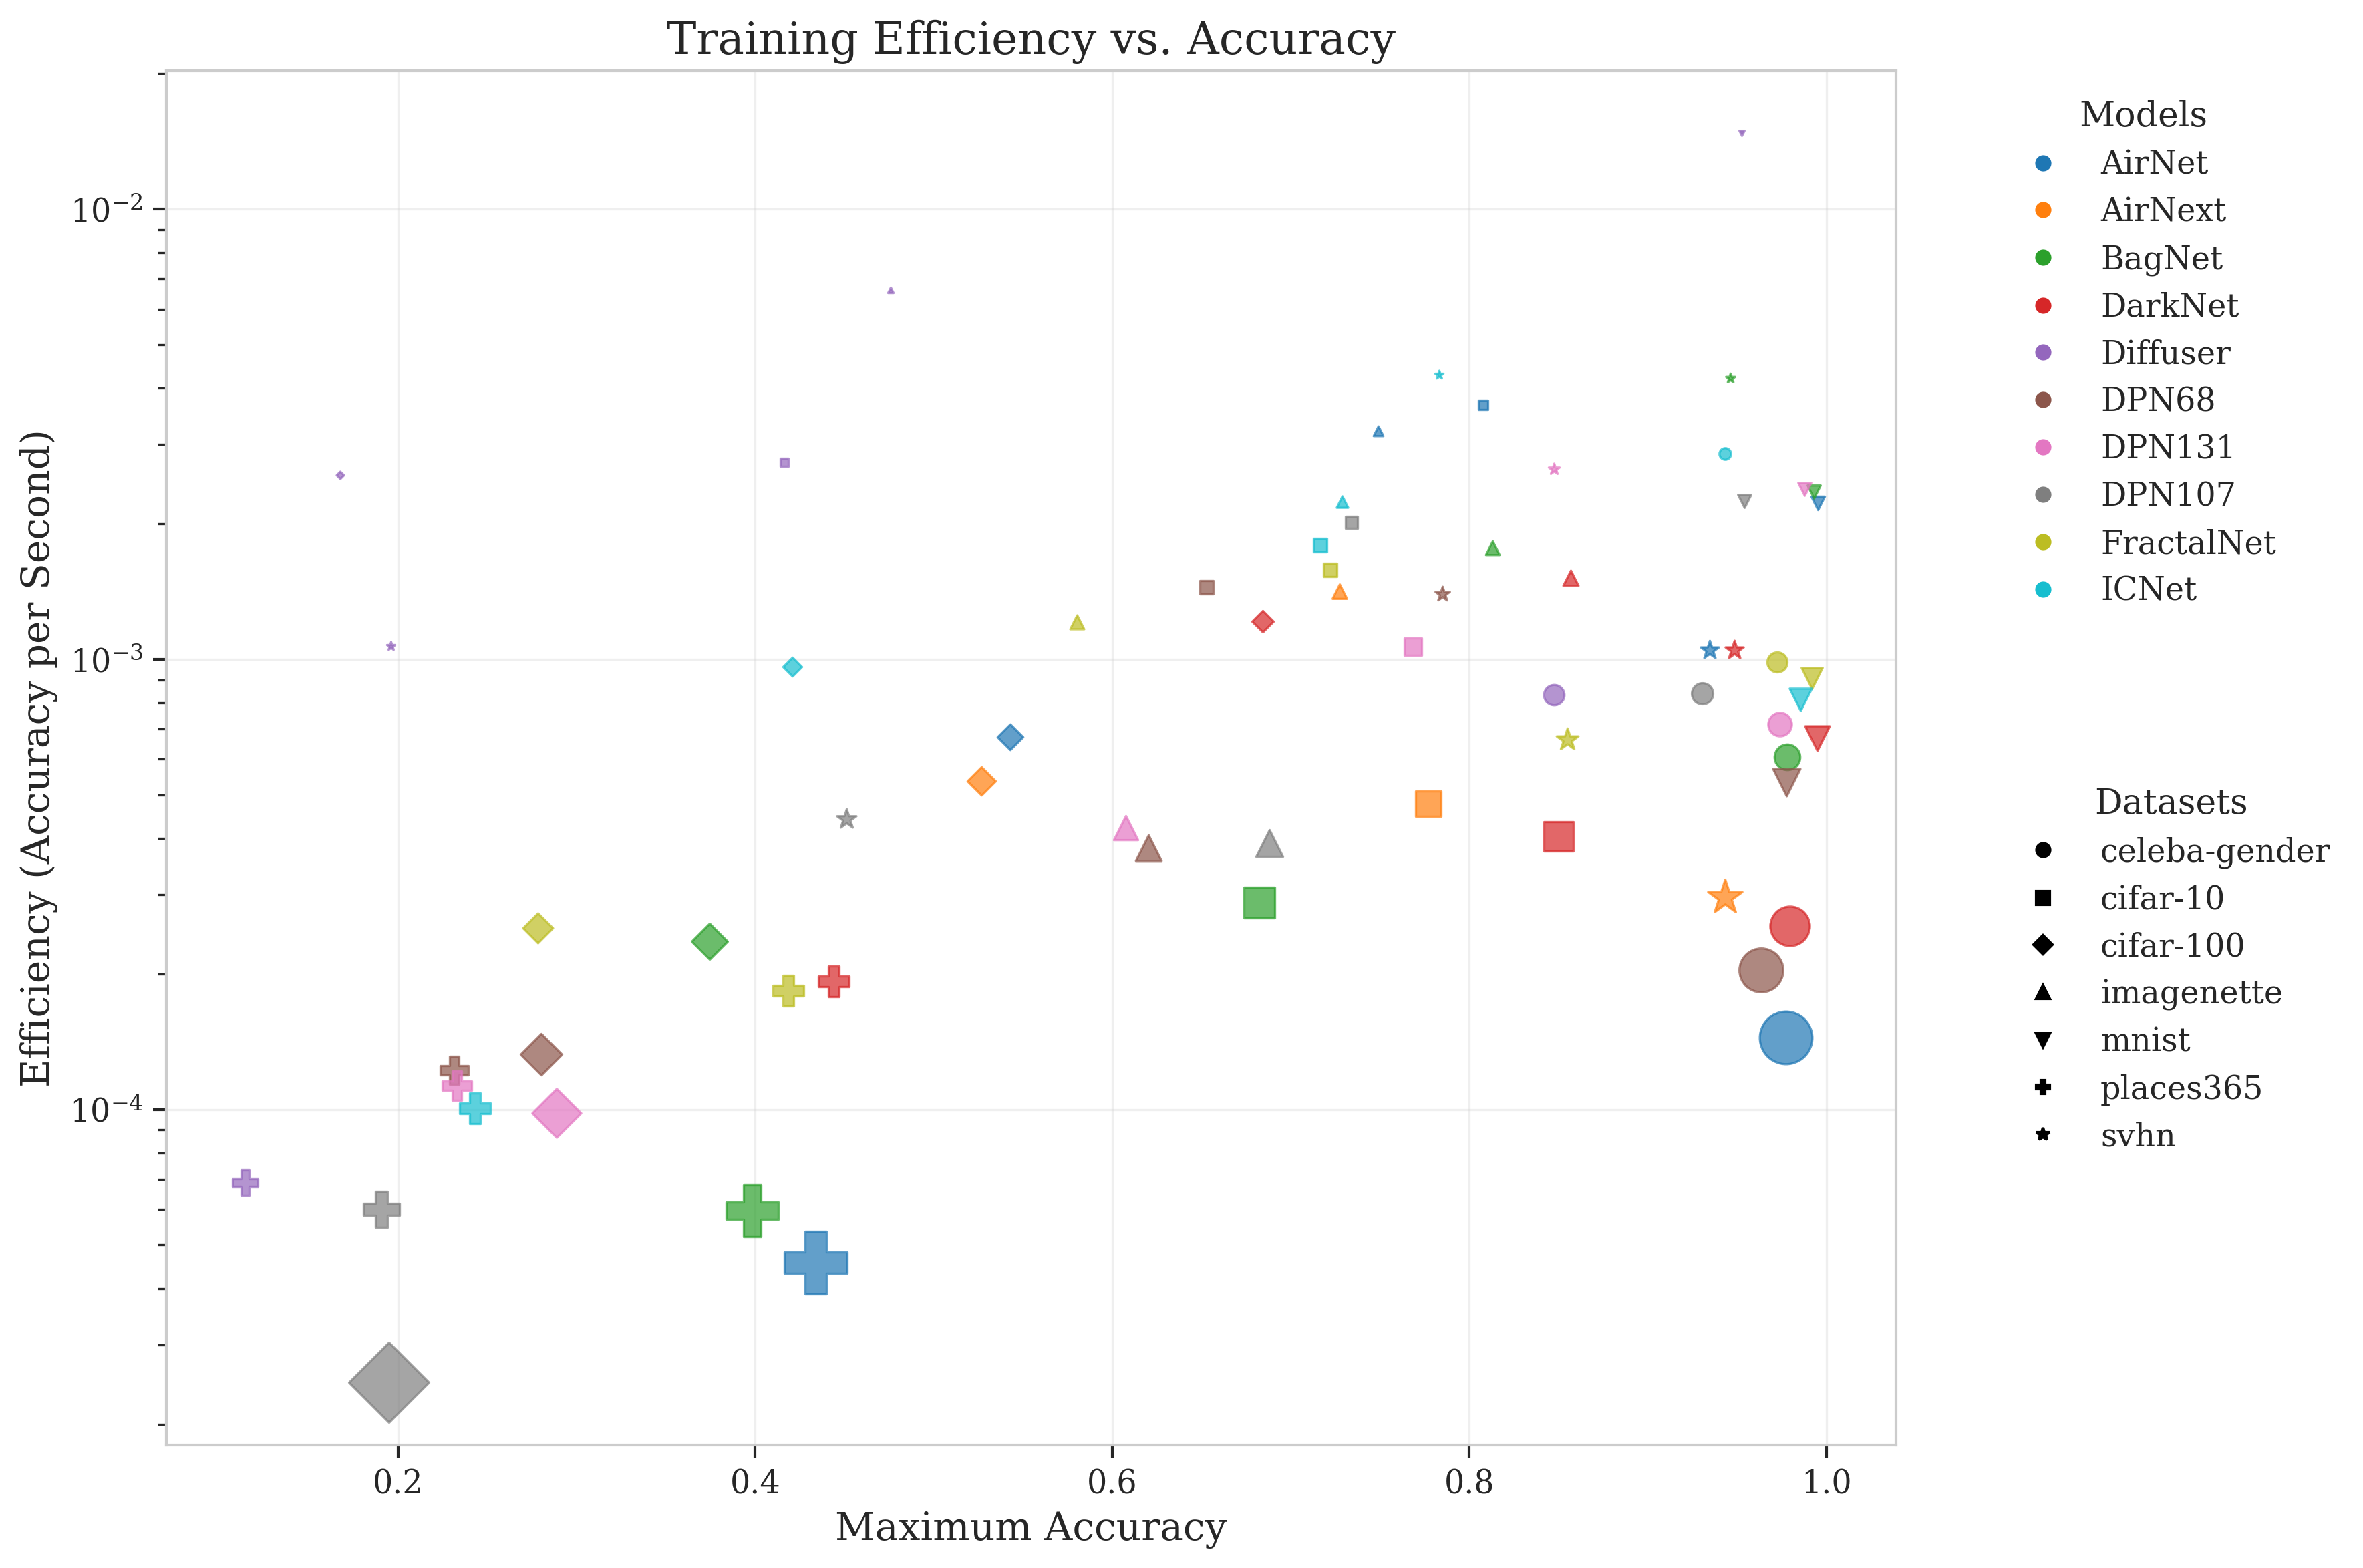

In [6]:
# Define symbols for datasets
dataset_symbols = {
    'celeba-gender': 'o',
    'cifar-10': 's',
    'cifar-100': 'D',
    'imagenette': '^',
    'mnist': 'v',
    'places365': 'P',
    'svhn': '*'
}

# Update the visualization function to remove dataset names from the graph
def create_efficiency_visualization():
    print("Creating training efficiency visualization...")
    # Calculate efficiency as accuracy per training second
    efficiency_data = []
    
    for (nn, dataset), group in filtered_df.groupby(['nn', 'dataset']):
        max_accuracy = group['accuracy'].max()
        avg_duration = group['duration_seconds'].mean()
        
        if not pd.isna(avg_duration) and avg_duration > 0:
            efficiency = max_accuracy / avg_duration
            efficiency_data.append({
                'nn': nn,
                'dataset': dataset,
                'efficiency': efficiency,
                'max_accuracy': max_accuracy,
                'avg_duration': avg_duration
            })
    
    efficiency_df = pd.DataFrame(efficiency_data)
    
    # Create bubble chart - efficiency vs accuracy with size as duration
    plt.figure(figsize=(12, 8))
    
    for nn in relevant_models:
        model_data = efficiency_df[efficiency_df['nn'] == nn]
        if not model_data.empty:
            for dataset in model_data['dataset'].unique():
                dataset_data = model_data[model_data['dataset'] == dataset]
                sizes = dataset_data['avg_duration'] / efficiency_df['avg_duration'].max() * 500
                plt.scatter(
                    dataset_data['max_accuracy'], 
                    dataset_data['efficiency'],
                    s=sizes,
                    alpha=0.7,
                    label=nn,
                    color=model_colors.get(nn),
                    marker=dataset_symbols.get(dataset, 'o')  # Default to 'o' if no symbol is defined
                )
    
    plt.title('Training Efficiency vs. Accuracy', fontsize=16)
    plt.xlabel('Maximum Accuracy', fontsize=14)
    plt.ylabel('Efficiency (Accuracy per Second)', fontsize=14)
    plt.xscale('linear')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    # Create legends for models and datasets
    model_legend = [plt.Line2D([0], [0], marker='o', color=color, label=model, linestyle='') 
                    for model, color in model_colors.items()]
    dataset_legend = [plt.Line2D([0], [0], marker=symbol, color='black', label=dataset, linestyle='') 
                    for dataset, symbol in dataset_symbols.items()]
    
    # Add legends outside the plot
    model_legend_box = plt.legend(handles=model_legend, title='Models', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().add_artist(model_legend_box)  # Add the model legend first
    plt.legend(handles=dataset_legend, title='Datasets', bbox_to_anchor=(1.05, 0.5), loc='upper left')
    
    plt.tight_layout()
    plt.savefig('report_figures/training_efficiency_with_separate_legends.png')
    
    # Display the plot in the notebook
    plt.show()

# Run the function to create and display the visualization
create_efficiency_visualization()


Creating learning curves for each dataset...


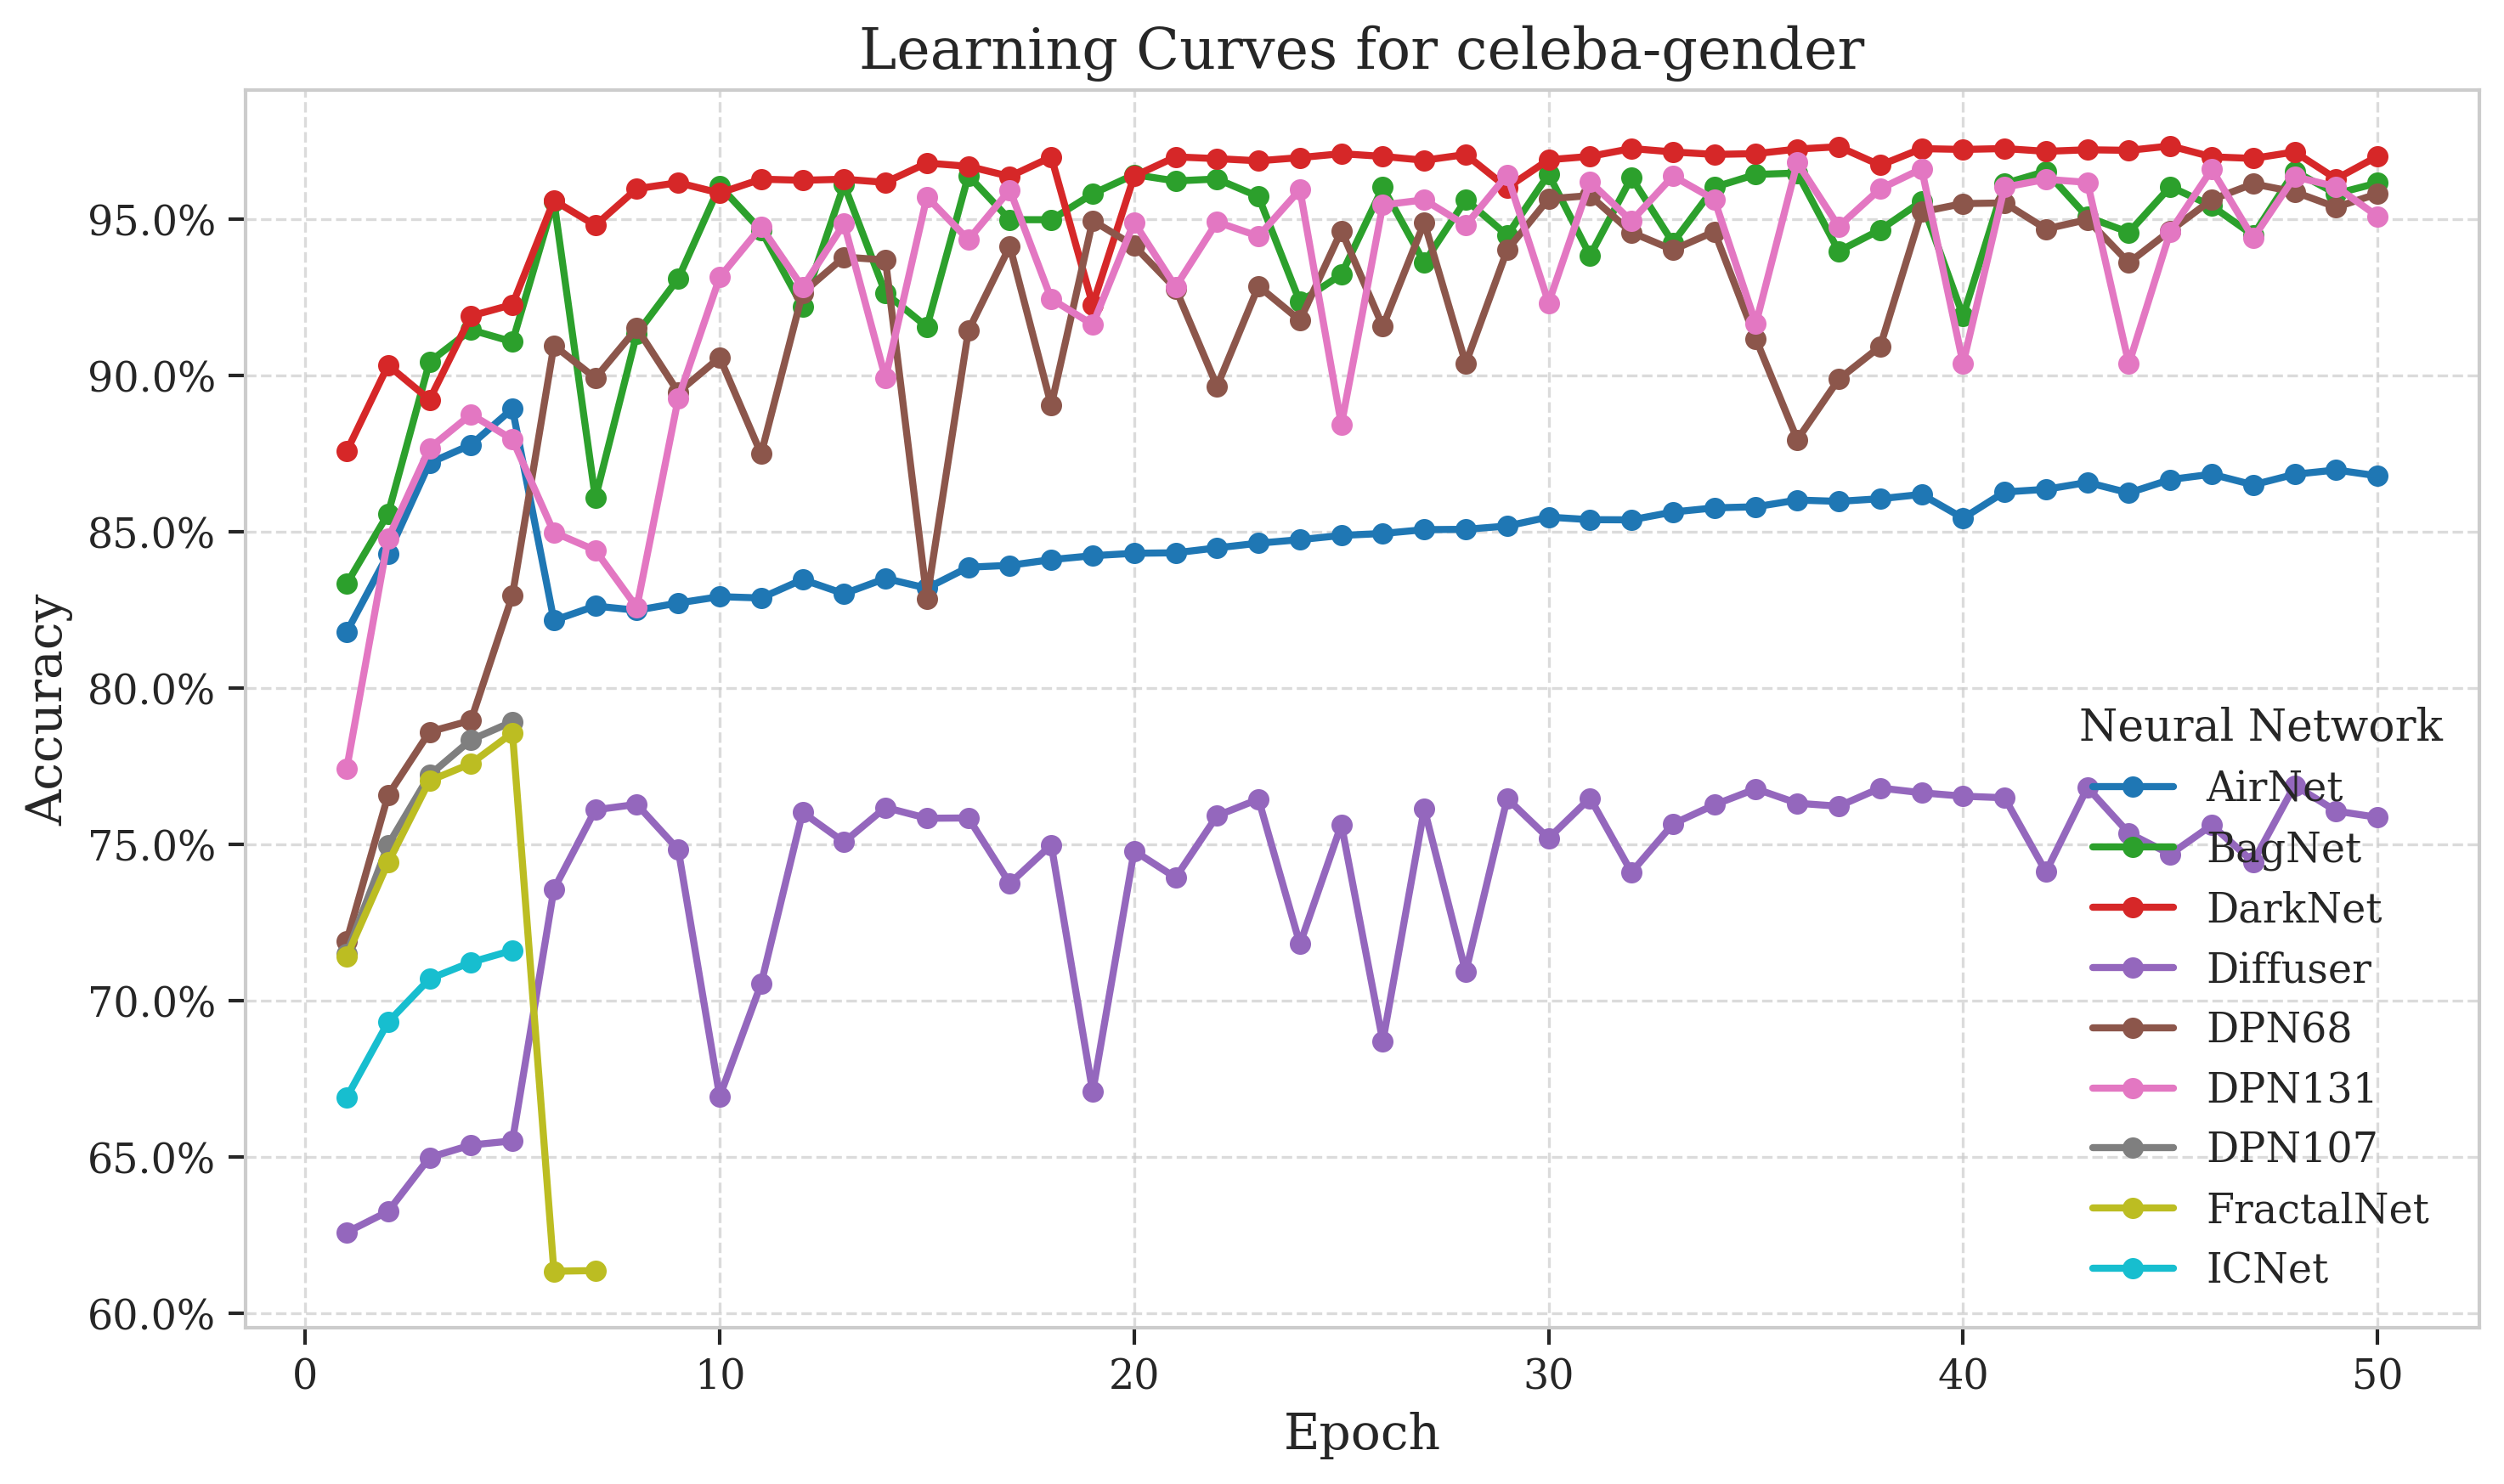

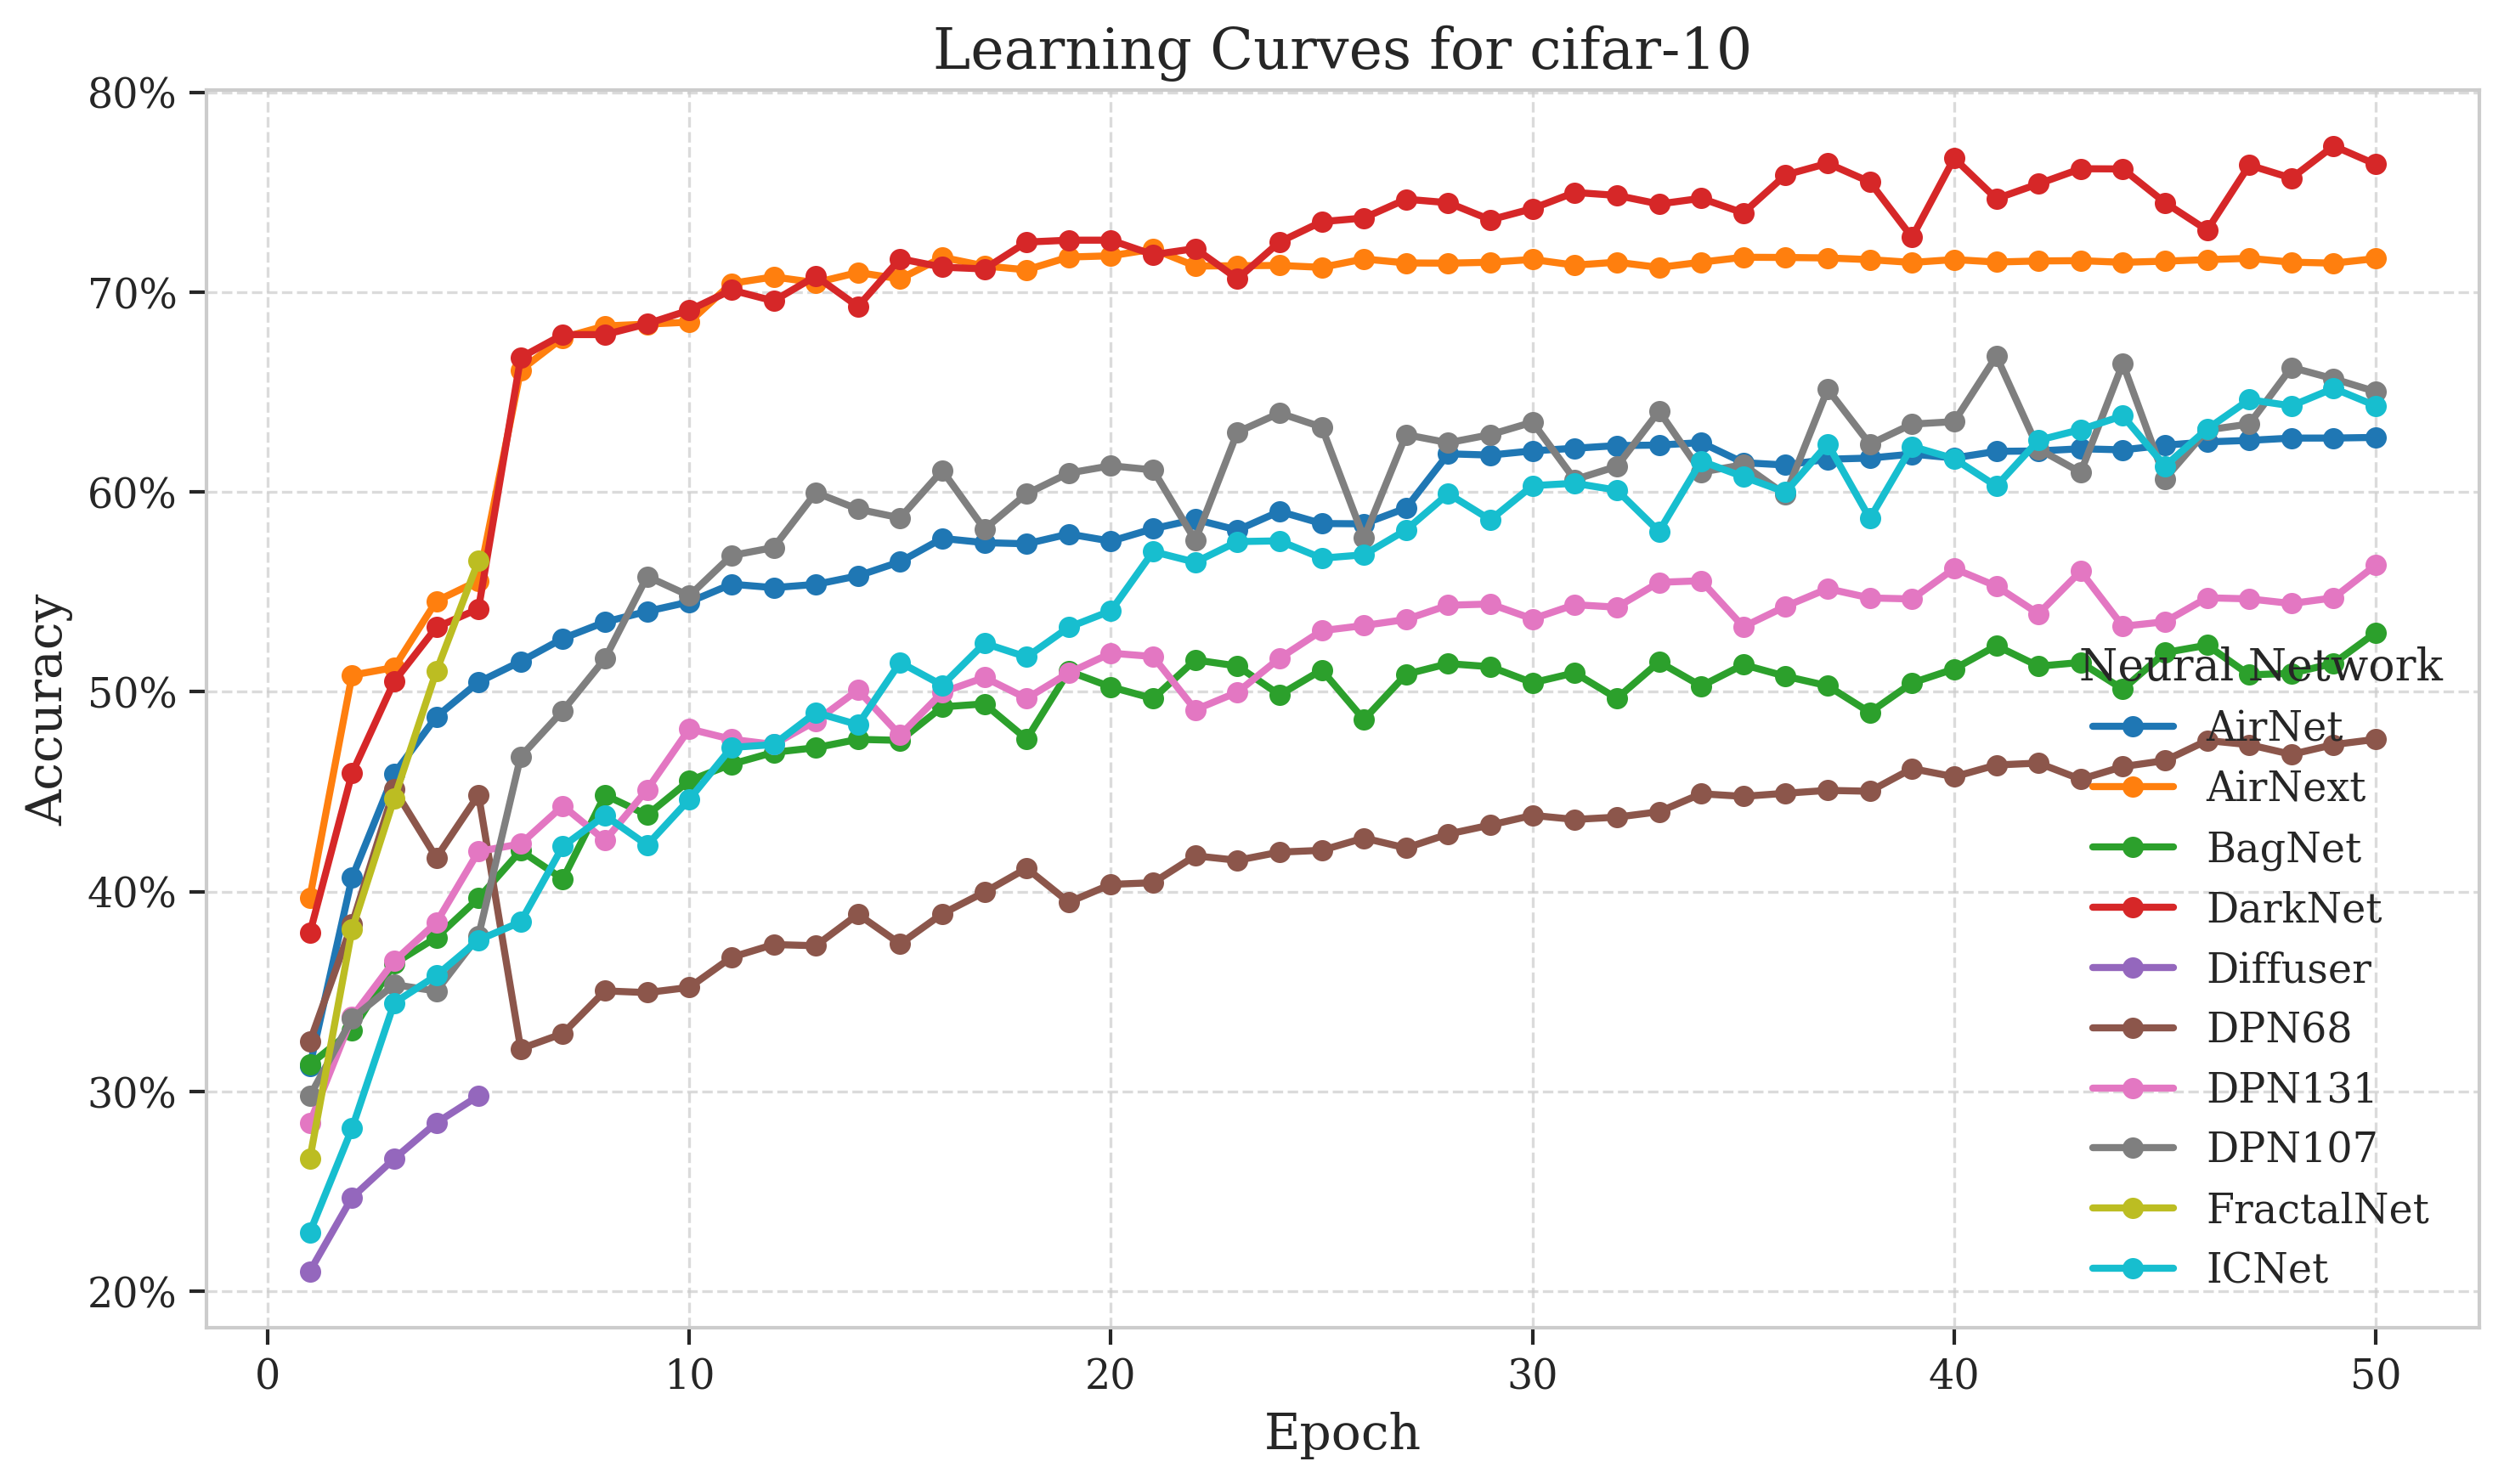

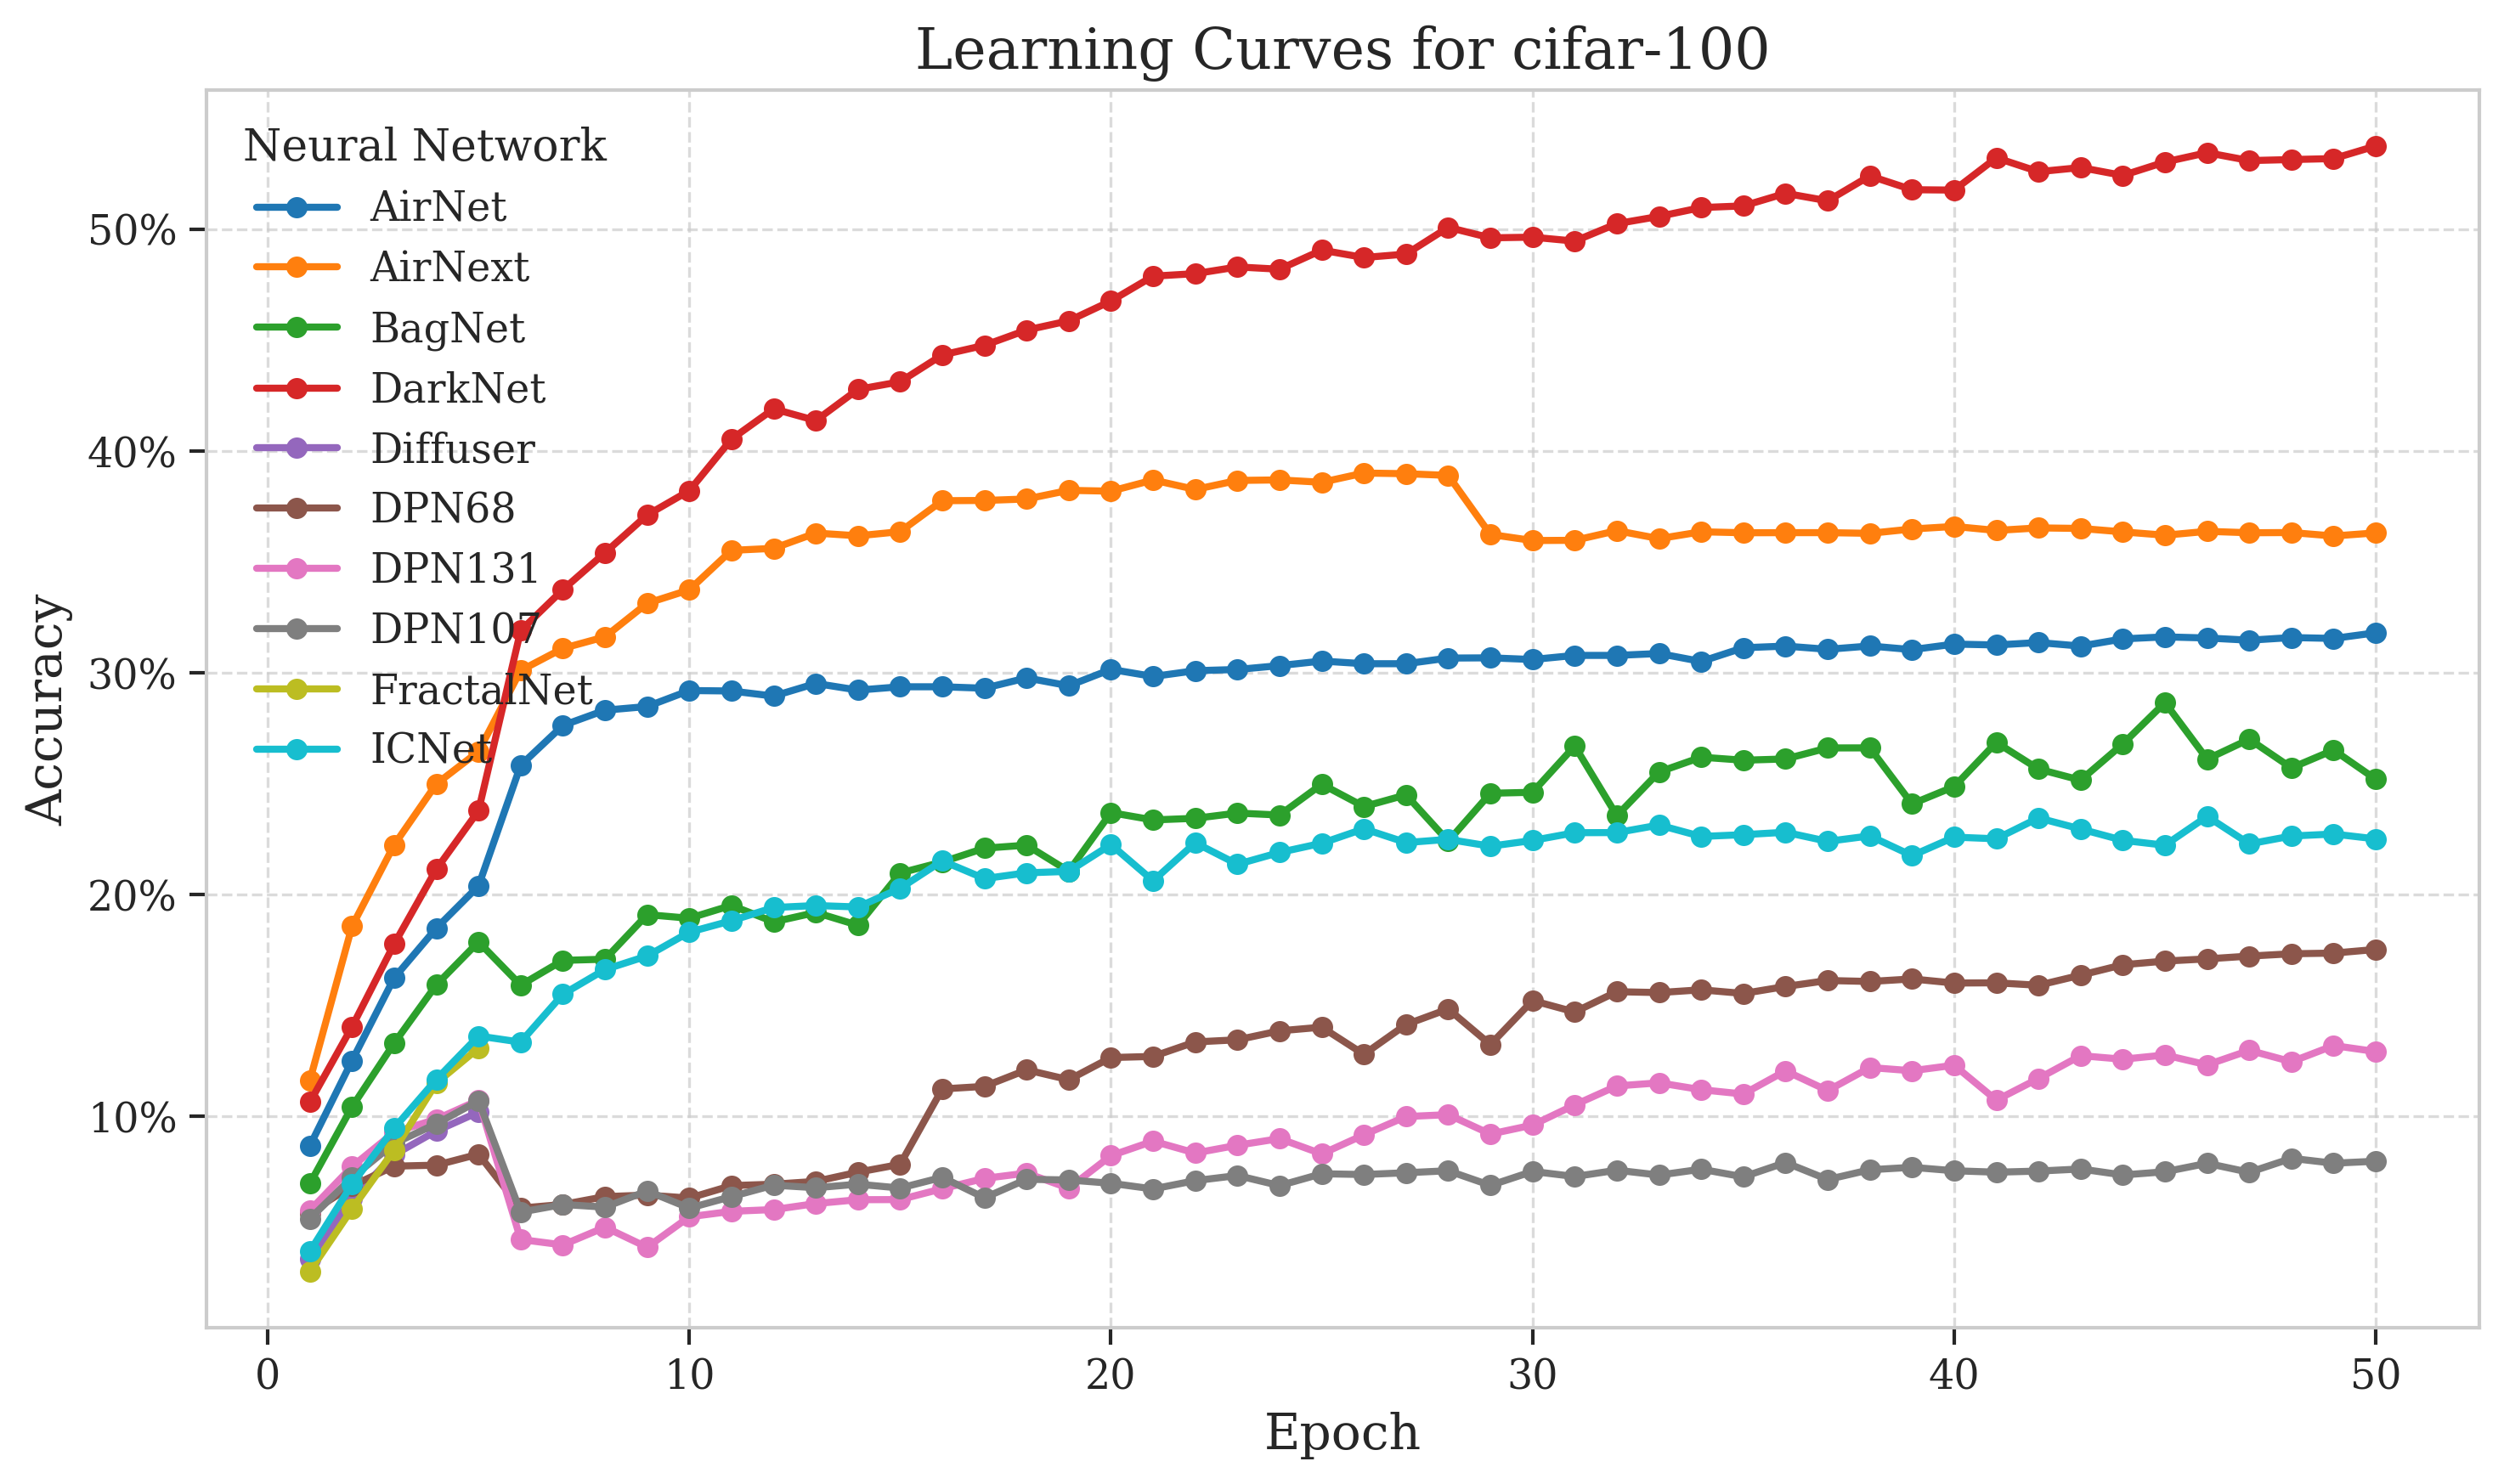

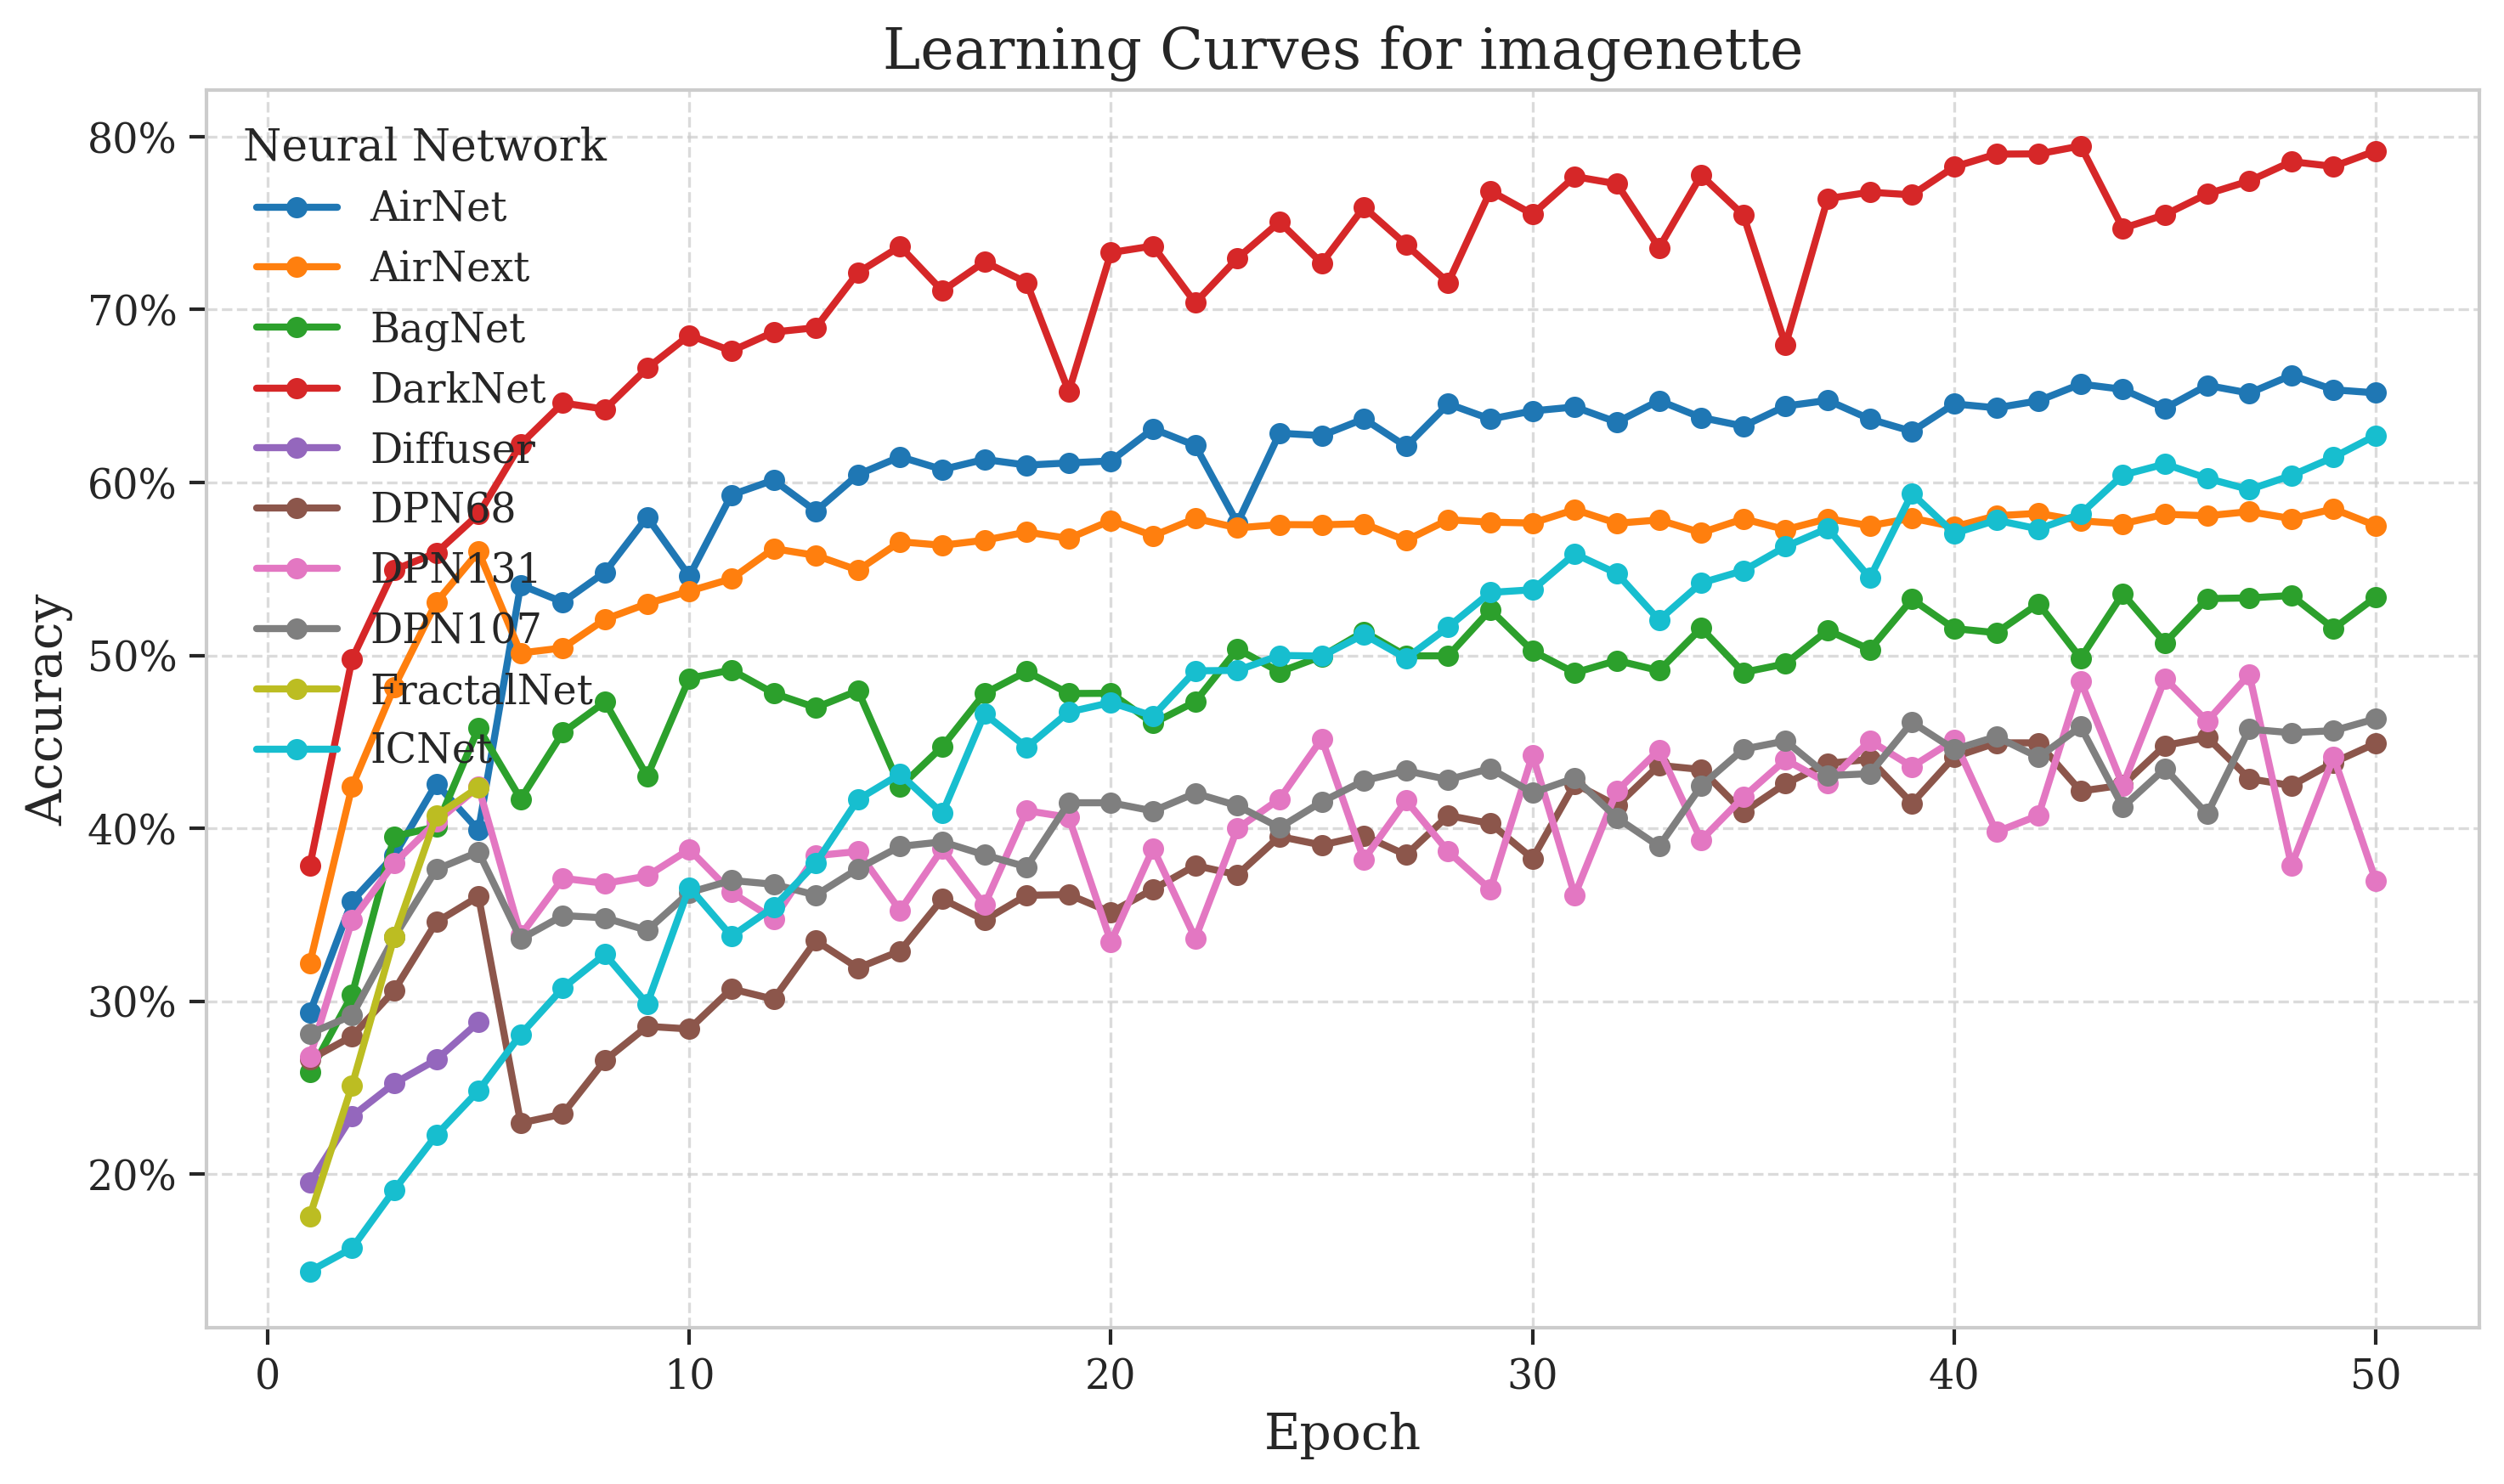

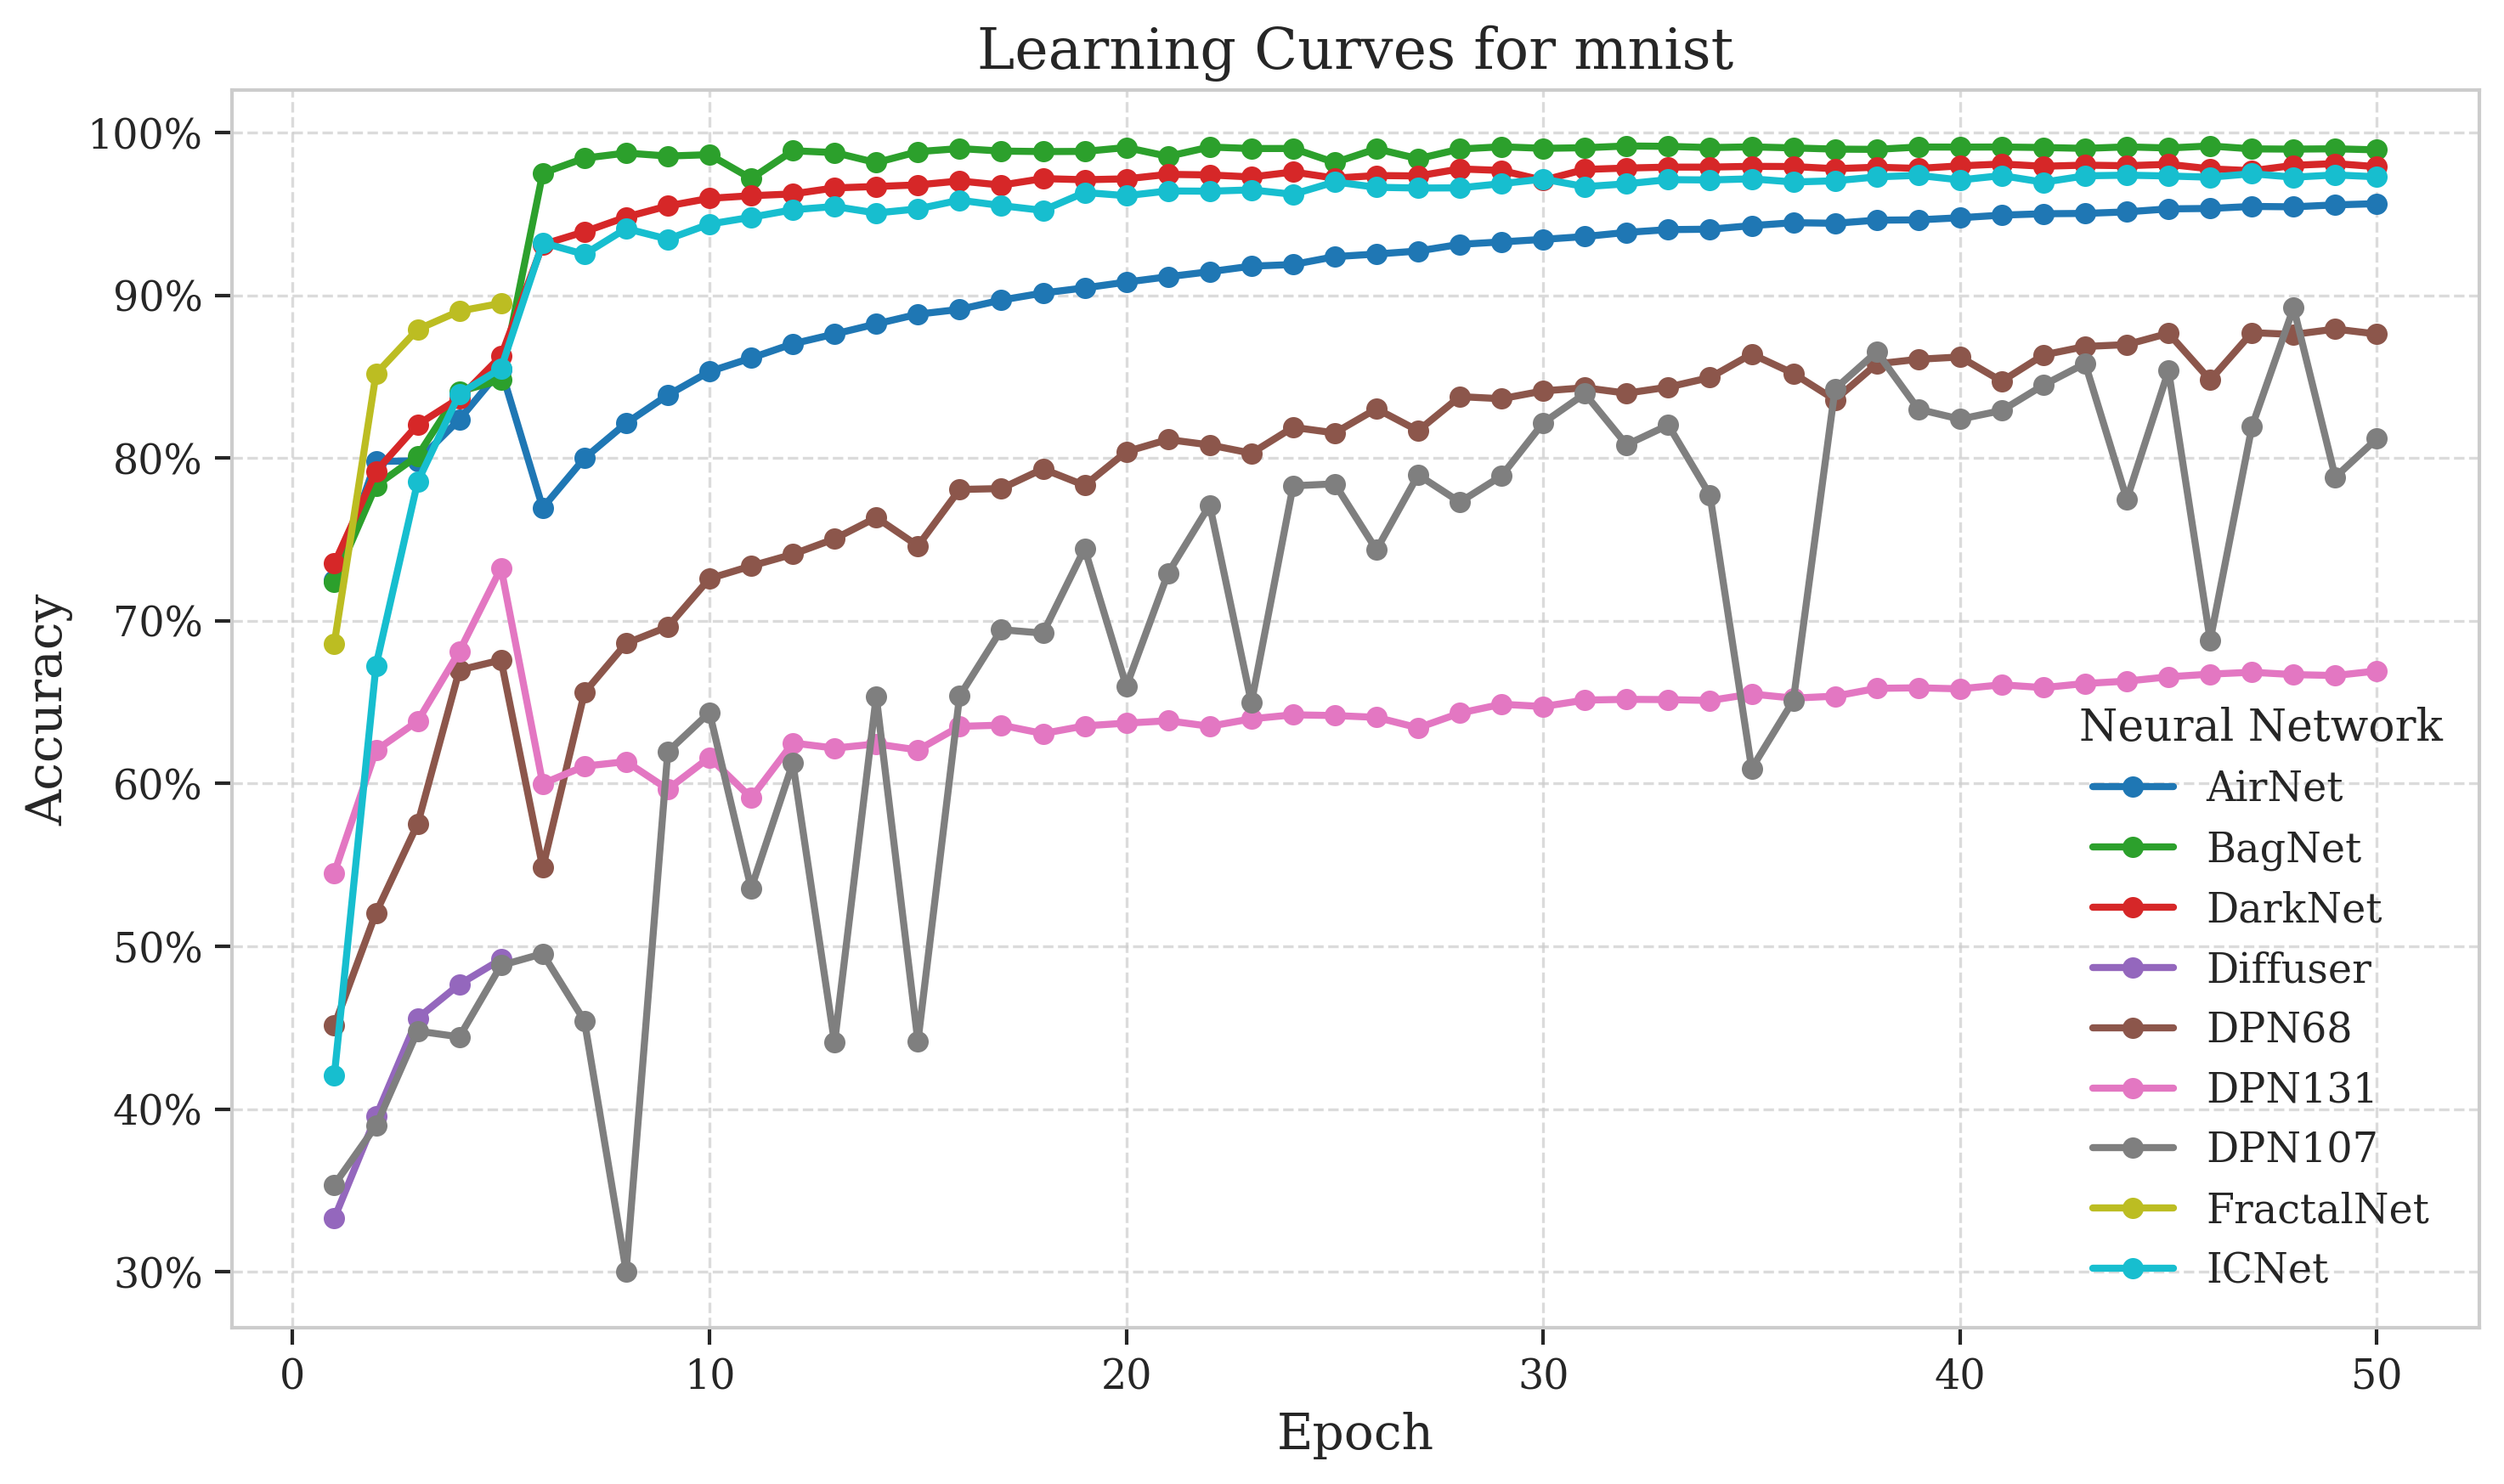

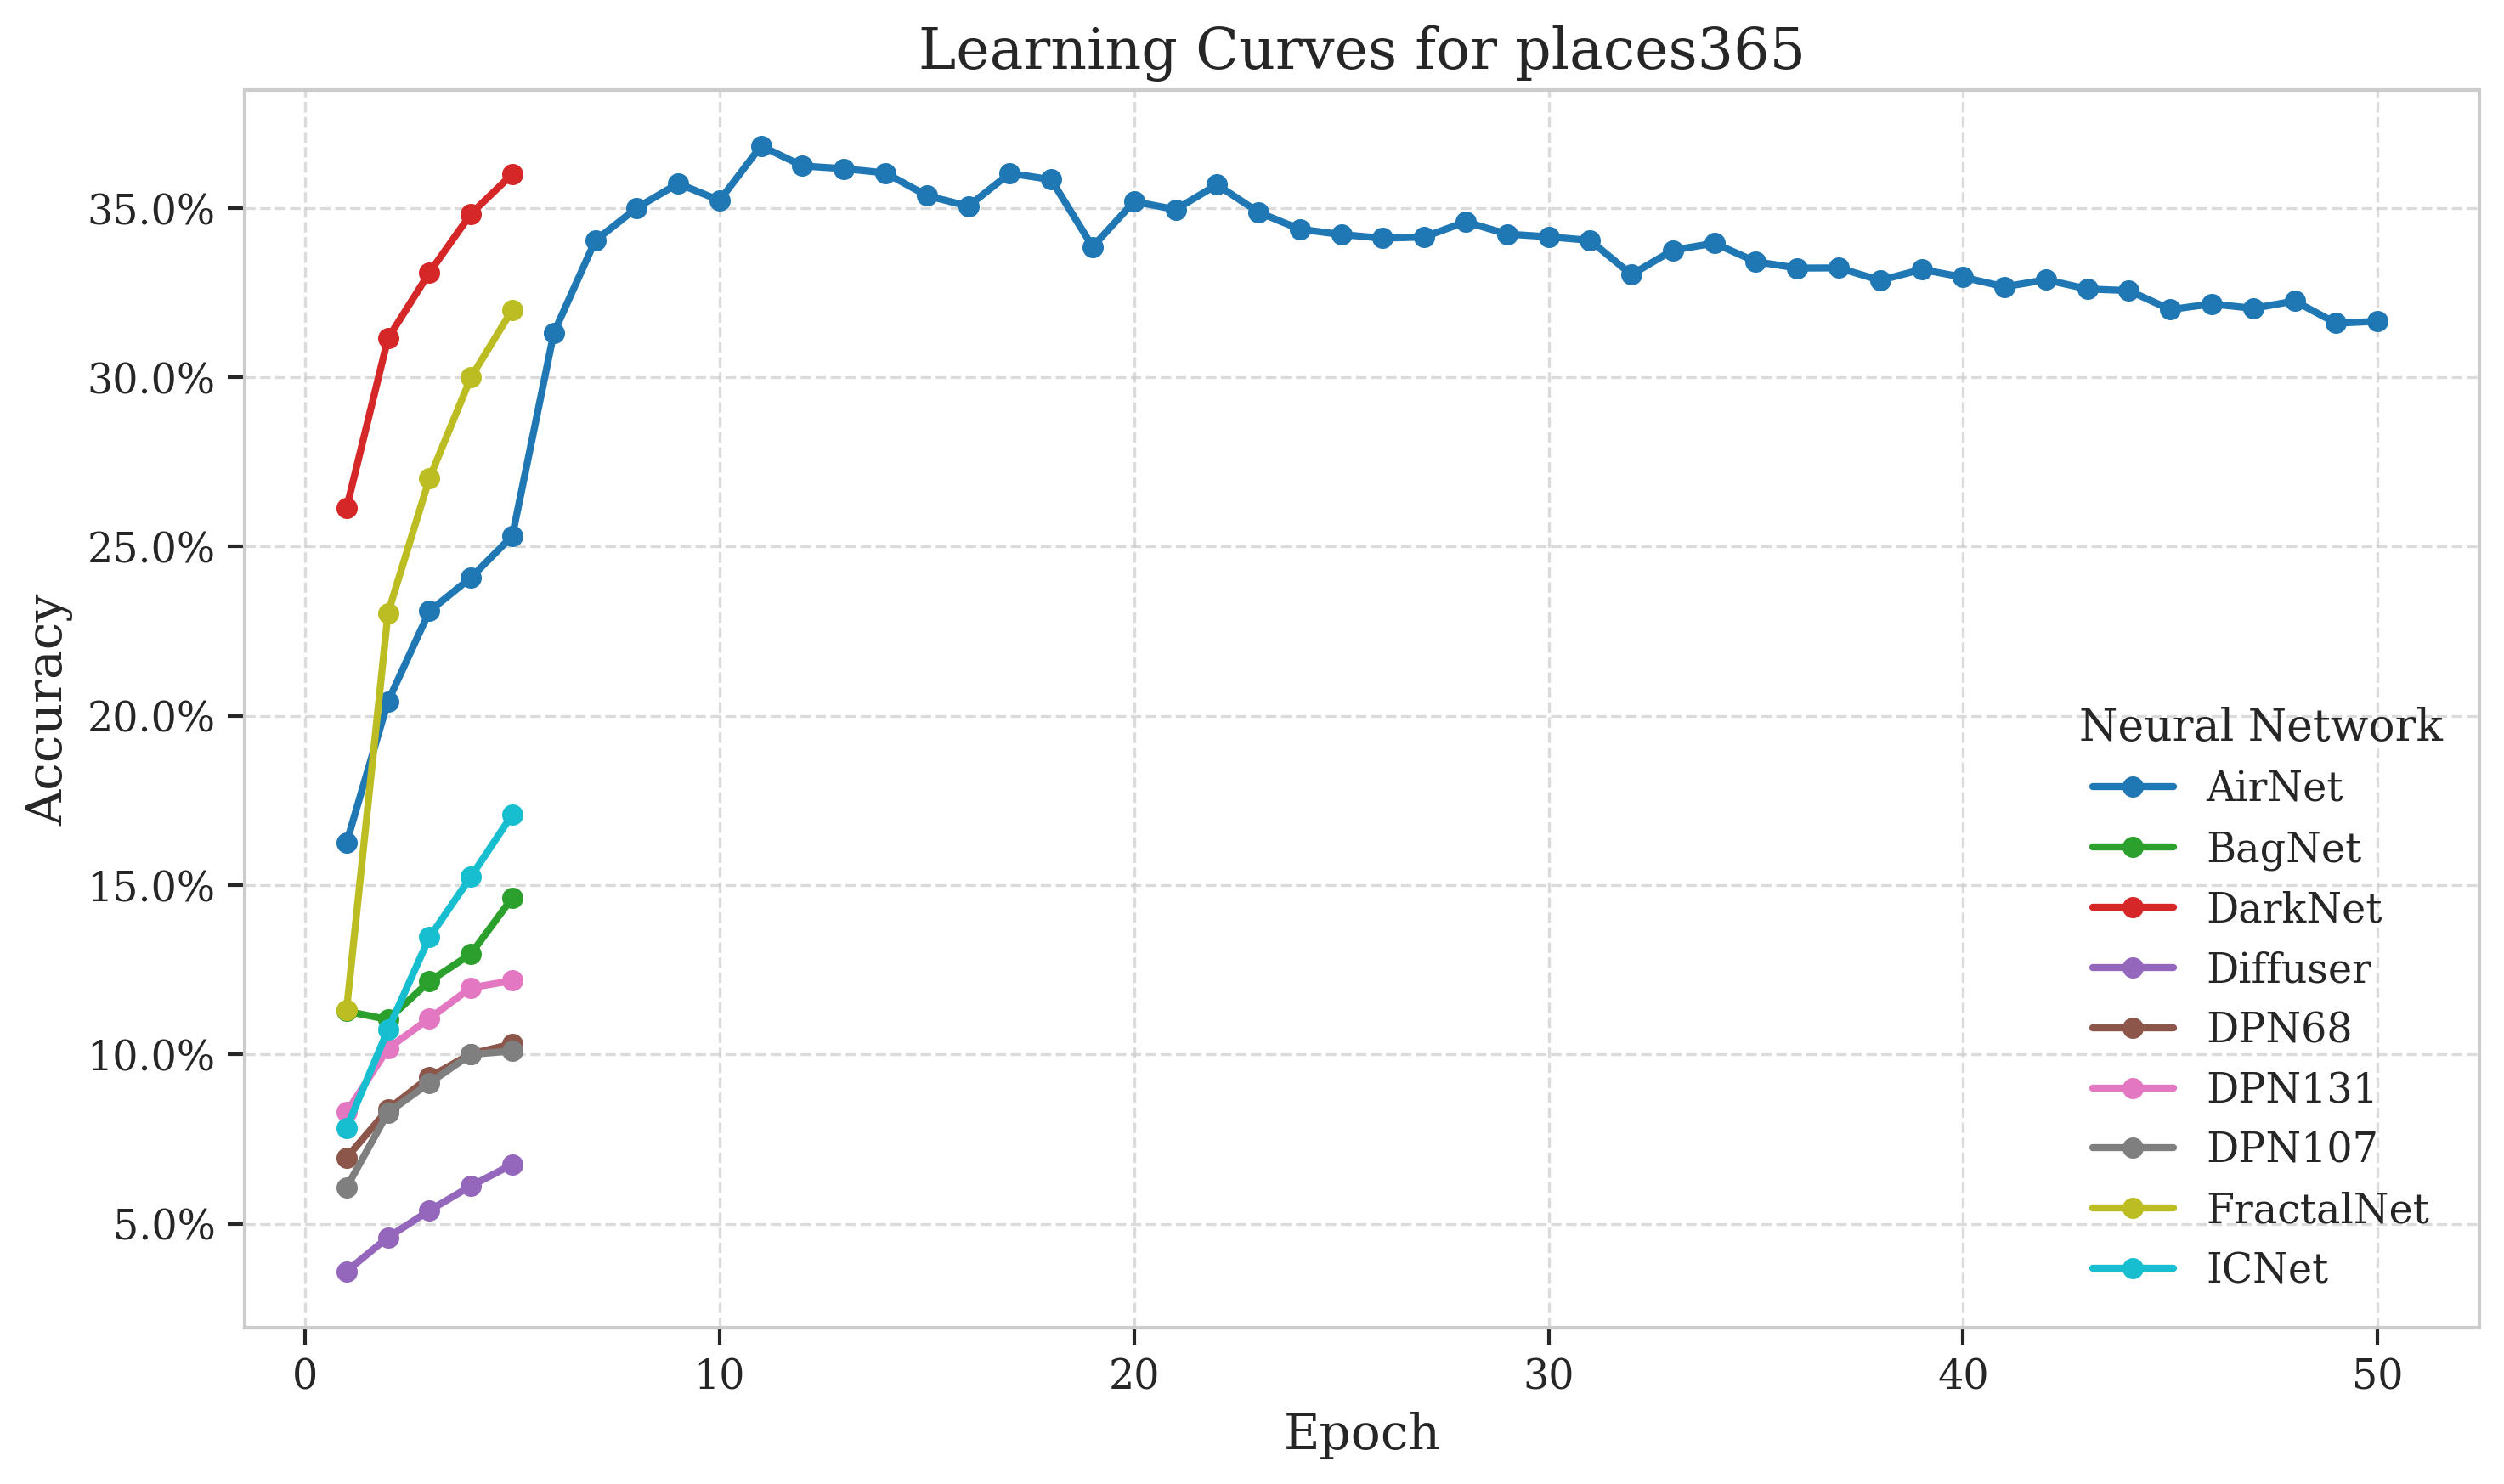

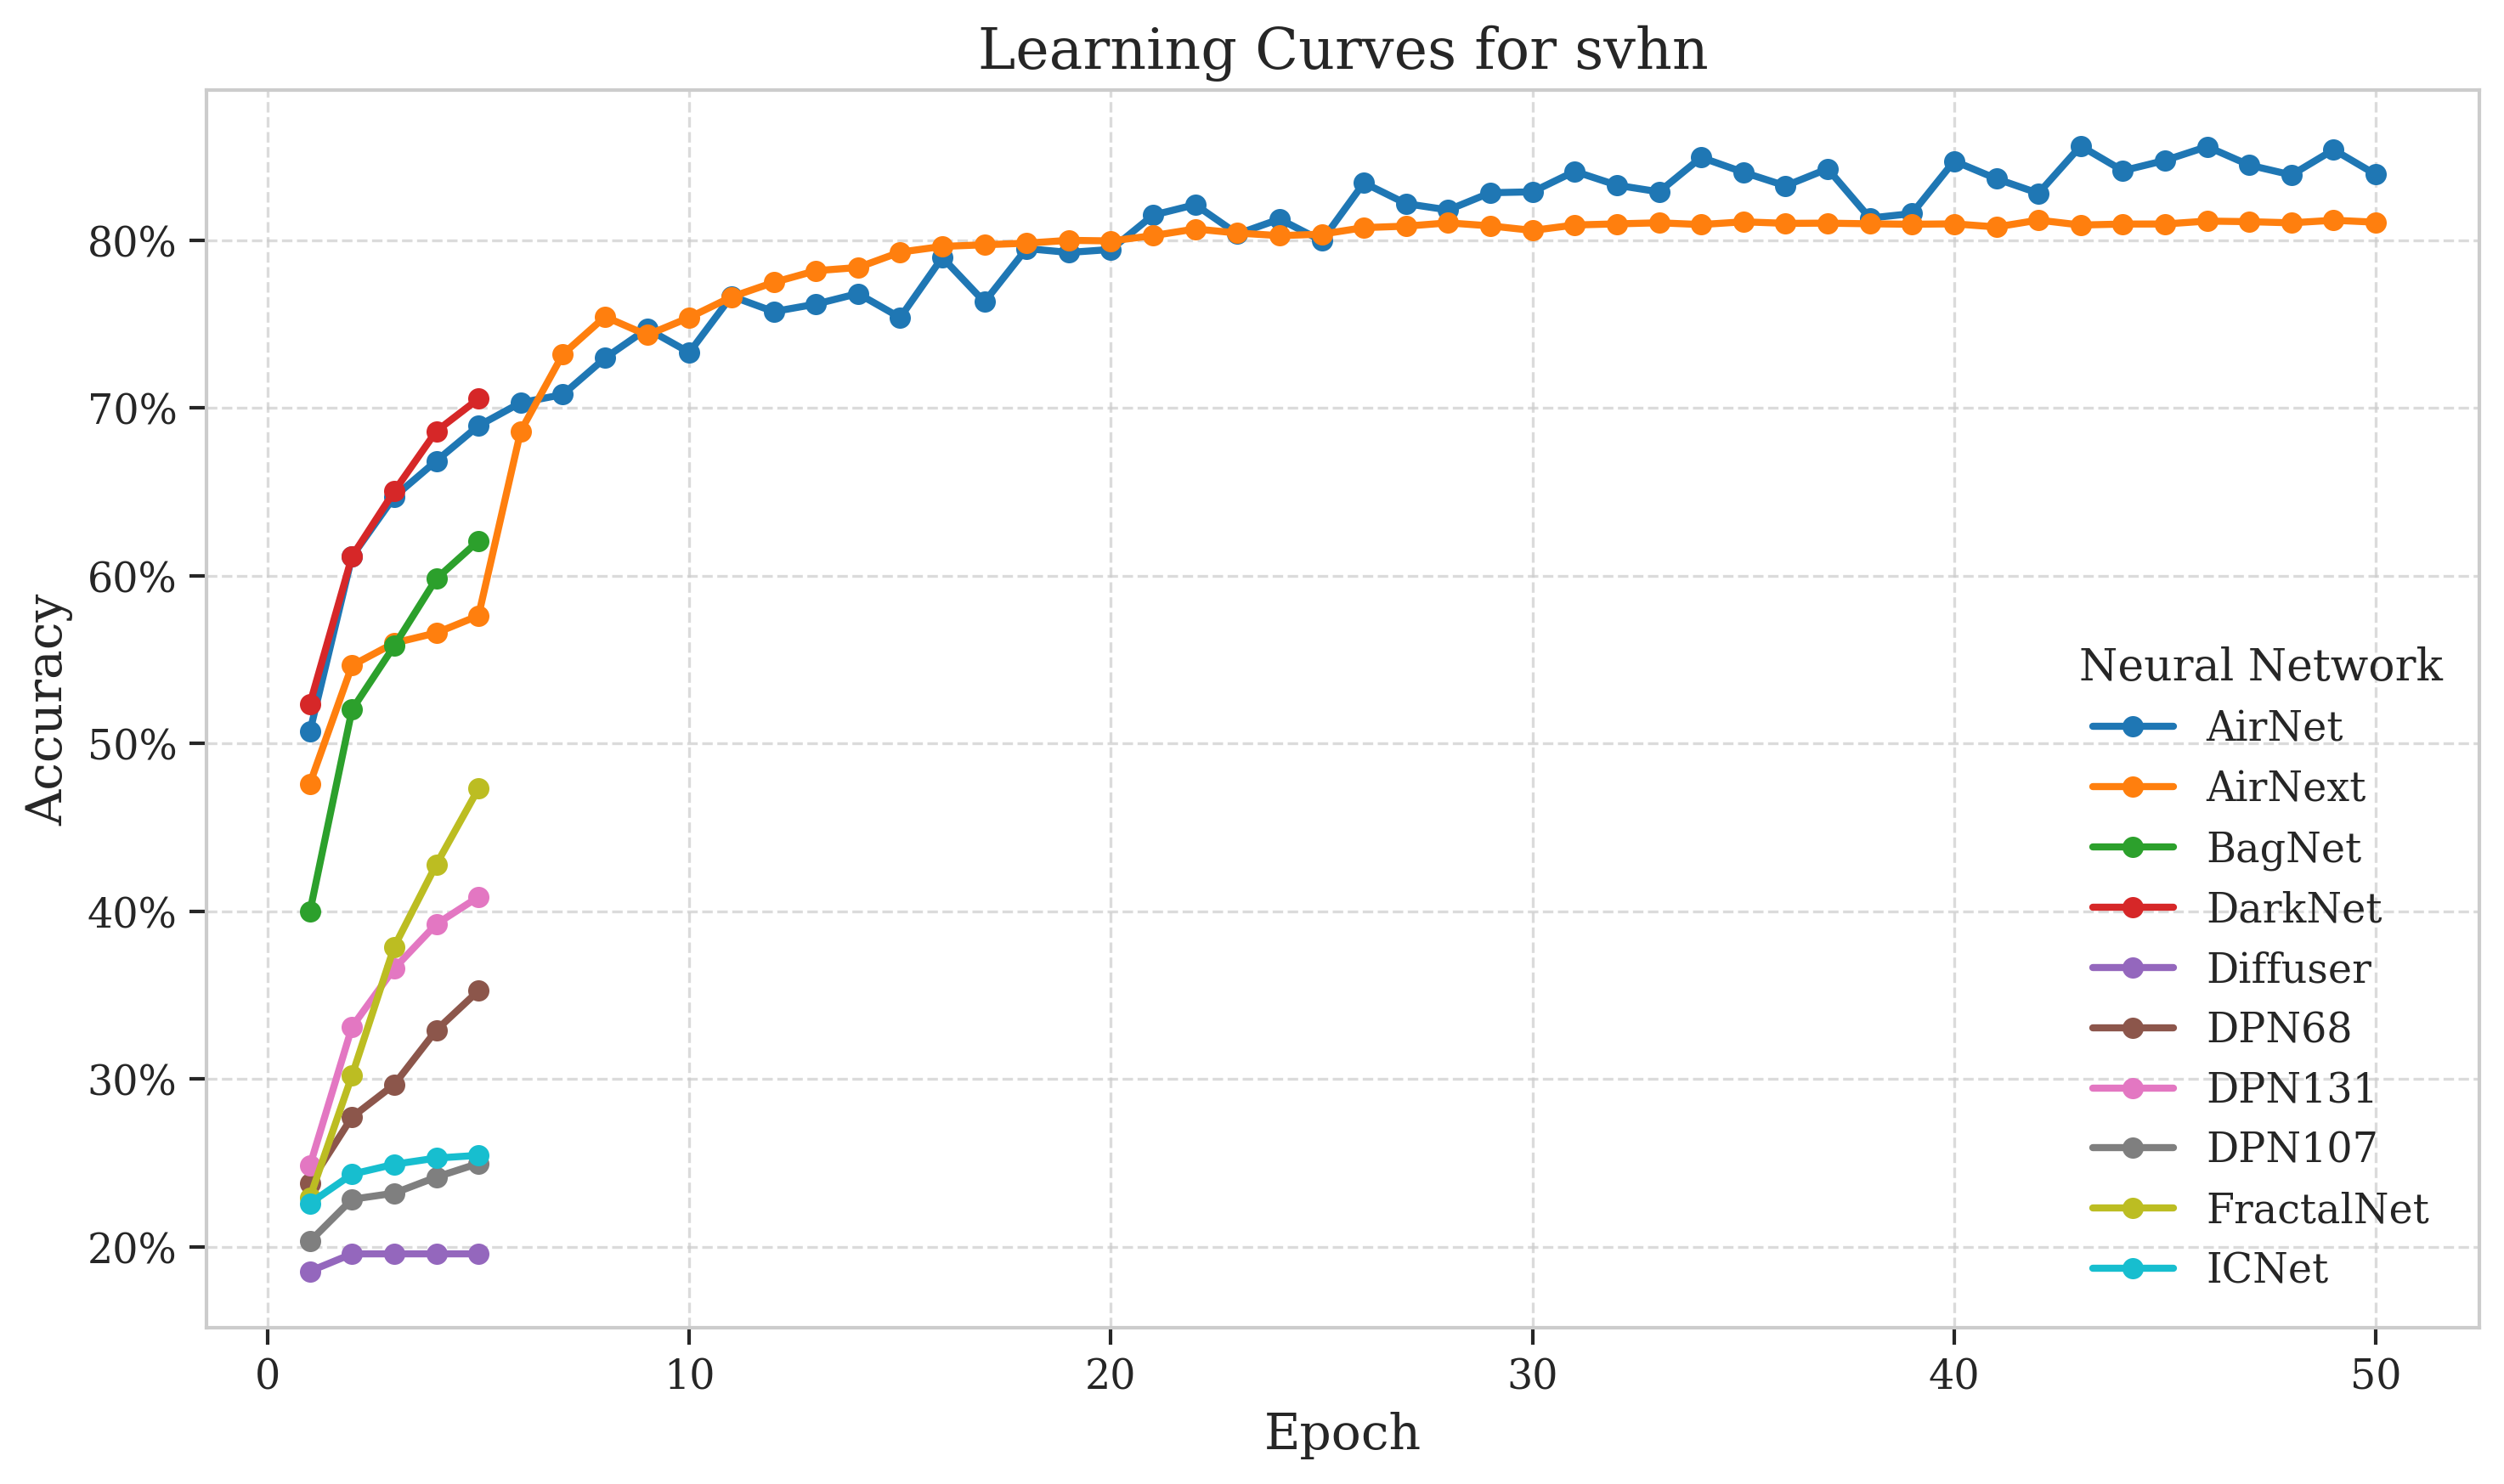

In [7]:
## Visualization 4: Learning Curves

def create_learning_curves():
    print("Creating learning curves for each dataset...")
    for dataset in relevant_datasets:
        dataset_data = filtered_df[filtered_df['dataset'] == dataset]
        
        if dataset_data.empty:
            continue
        
        plt.figure(figsize=(10, 6))
        
        for model in relevant_models:
            model_data = dataset_data[dataset_data['nn'] == model]
            
            # Group by epoch and get mean accuracy
            by_epoch = model_data.groupby('epoch')['accuracy'].mean().reset_index()
            
            if not by_epoch.empty:
                plt.plot(
                    by_epoch['epoch'], 
                    by_epoch['accuracy'], 
                    marker='o', 
                    markersize=5,
                    linewidth=2, 
                    label=model,
                    color=model_colors.get(model)
                )
        
        plt.title(f'Learning Curves for {dataset}', fontsize=16)
        plt.xlabel('Epoch', fontsize=14)
        plt.ylabel('Accuracy', fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.legend(title='Neural Network')
        ax = plt.gca()
        ax.yaxis.set_major_formatter(PercentFormatter(1.0))
        plt.tight_layout()
        plt.savefig(f'report_figures/learning_curve_{dataset}.png')
        
        # Display the plot in the notebook
        plt.show()

# Run the function to create and display learning curves for each dataset
create_learning_curves()

Creating convergence speed visualization...


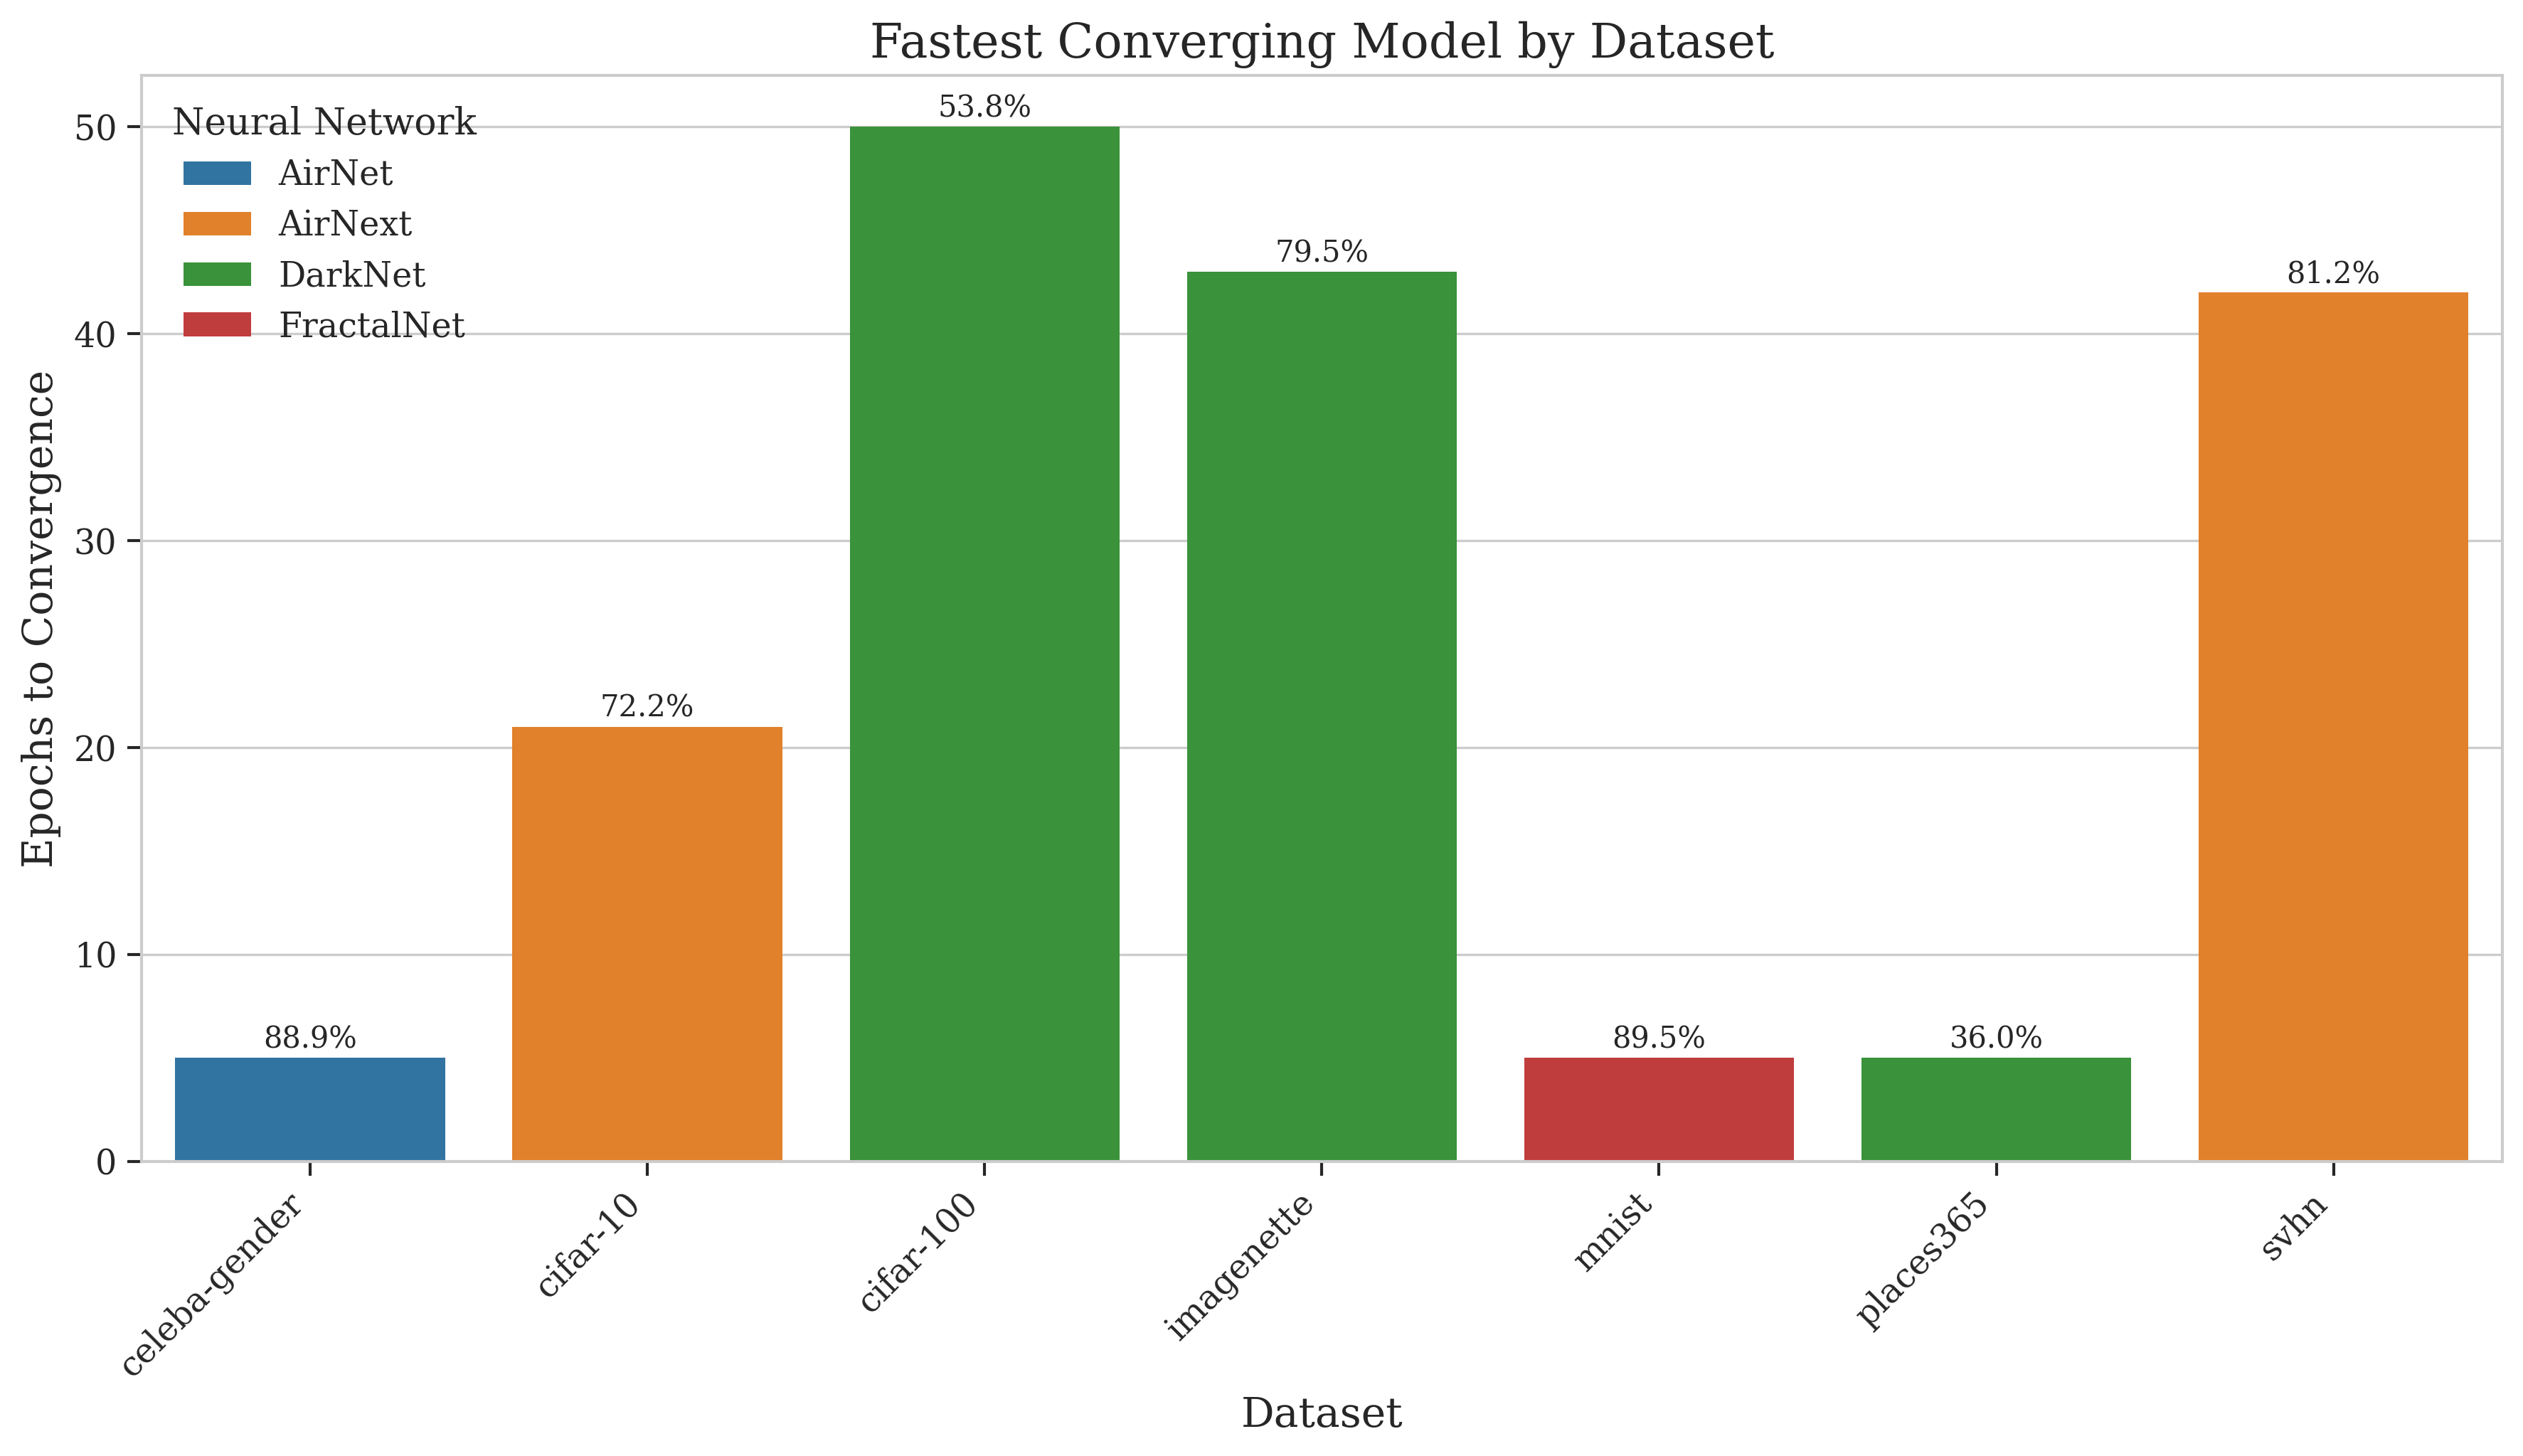

In [8]:
## Visualization 5: Convergence Speed

def create_convergence_visualization():
    print("Creating convergence speed visualization...")
    # Calculate epochs to convergence for each model-dataset combination
    convergence_data = []
    
    for (nn, dataset), group in filtered_df.groupby(['nn', 'dataset']):
        # Group by epoch and get mean accuracy
        by_epoch = group.groupby('epoch')['accuracy'].mean().reset_index()
        
        if not by_epoch.empty:
            max_accuracy = by_epoch['accuracy'].max()
            convergence_epoch = by_epoch.loc[by_epoch['accuracy'].idxmax(), 'epoch']
            
            convergence_data.append({
                'nn': nn,
                'dataset': dataset,
                'max_accuracy': max_accuracy,
                'convergence_epoch': convergence_epoch
            })
    
    convergence_df = pd.DataFrame(convergence_data)
    
    # Find fastest converging model for each dataset that achieves at least 90% of best accuracy
    fastest_models = []
    
    for dataset, dataset_group in convergence_df.groupby('dataset'):
        best_accuracy = dataset_group['max_accuracy'].max()
        threshold = best_accuracy * 0.9
        
        valid_models = dataset_group[dataset_group['max_accuracy'] >= threshold]
        if not valid_models.empty:
            fastest = valid_models.loc[valid_models['convergence_epoch'].idxmin()]
            fastest_models.append(fastest)
    
    fastest_df = pd.DataFrame(fastest_models)
    
    # Create bar chart of convergence epochs
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(
        x='dataset',
        y='convergence_epoch',
        hue='nn',
        data=fastest_df,
        palette=sns.color_palette("tab10", len(fastest_df['nn'].unique()))
    )
    
    plt.title('Fastest Converging Model by Dataset', fontsize=16)
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel('Epochs to Convergence', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    # Add accuracy annotations
    for i, row in enumerate(fastest_df.itertuples()):
        ax.text(
            i, 
            row.convergence_epoch + 0.5, 
            f"{row.max_accuracy:.1%}", 
            ha='center', 
            fontsize=10
        )
    
    plt.legend(title='Neural Network')
    plt.tight_layout()
    plt.savefig('report_figures/convergence_speed.png')
    
    # Display the plot in the notebook
    plt.show()

# Run the function to create and display the visualization
create_convergence_visualization()

Creating dataset difficulty visualization...


C:\Users\yashk\AppData\Local\Temp\ipykernel_4192\2064893706.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


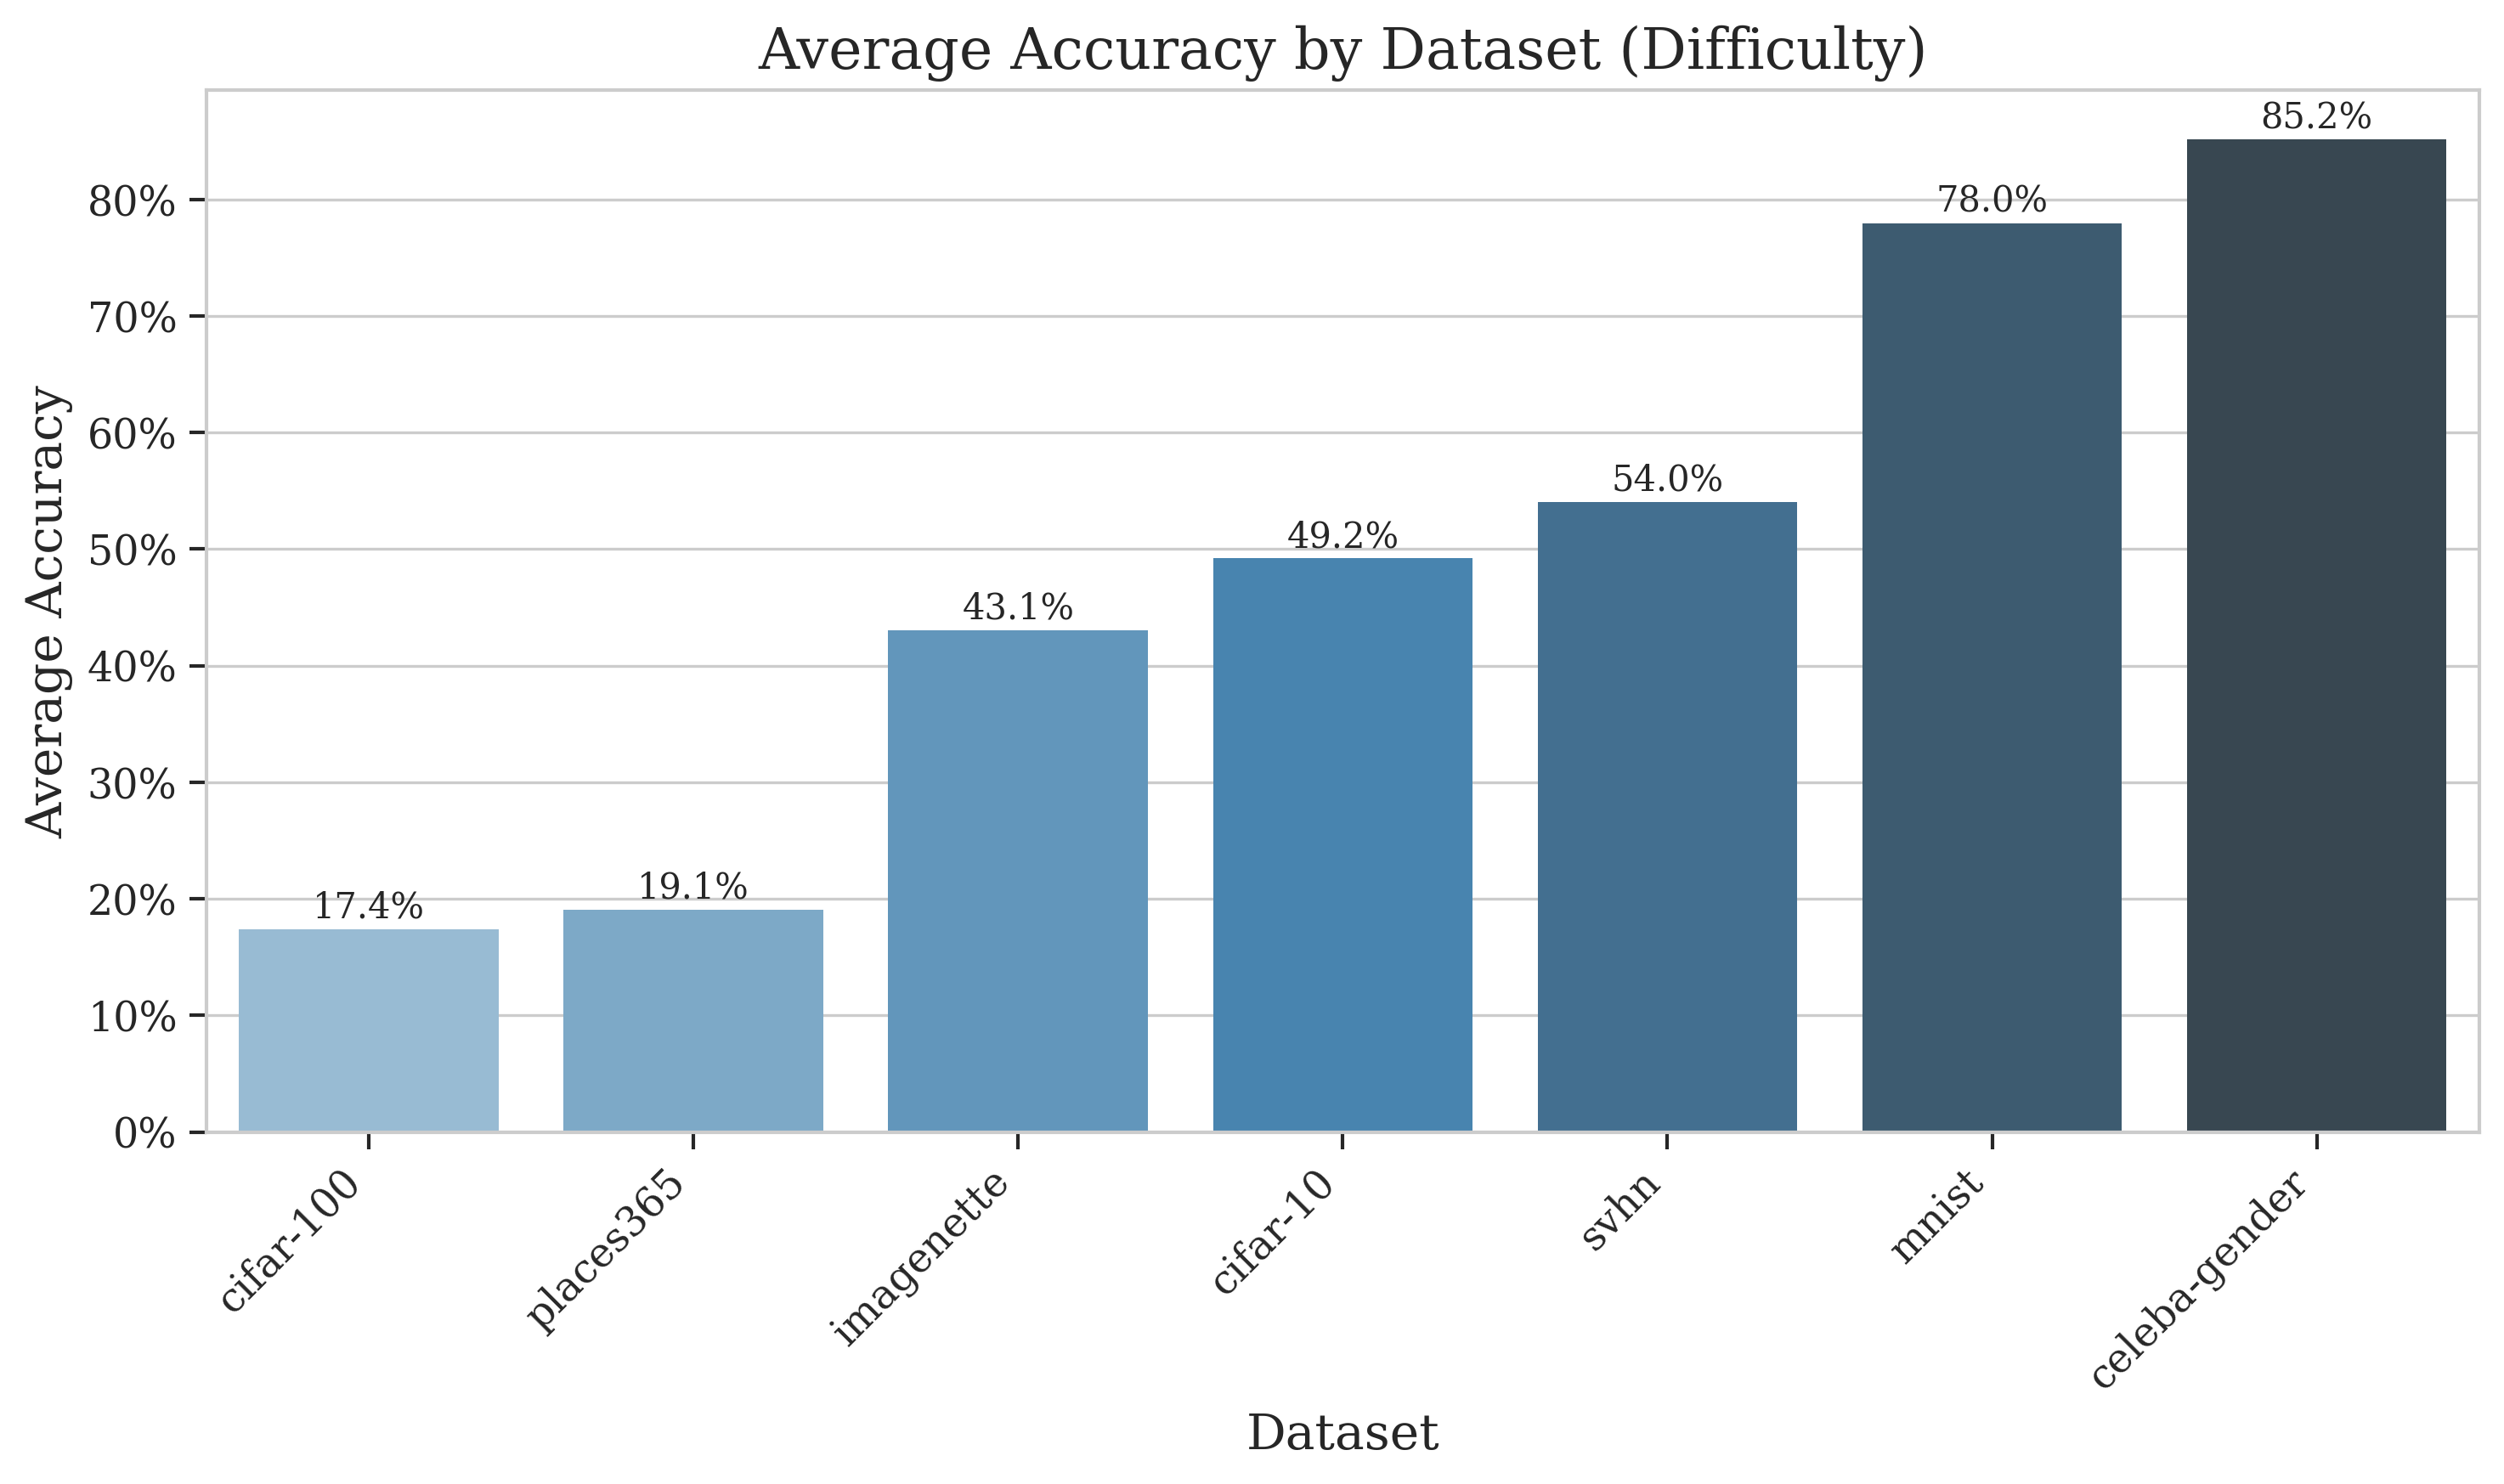

In [9]:
## Visualization 6: Dataset Difficulty

def create_dataset_difficulty_visualization():
    print("Creating dataset difficulty visualization...")
    # Calculate average accuracy across models for each dataset
    dataset_difficulty = filtered_df.groupby('dataset')['accuracy'].mean().sort_values()
    
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        x=dataset_difficulty.index, 
        y=dataset_difficulty.values,
        palette='Blues_d'
    )
    
    plt.title('Average Accuracy by Dataset (Difficulty)', fontsize=16)
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel('Average Accuracy', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage formatting to y-axis
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # Add value labels
    for i, v in enumerate(dataset_difficulty.values):
        ax.text(i, v + 0.01, f"{v:.1%}", ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.savefig('report_figures/dataset_difficulty.png')
    
    # Display the plot in the notebook
    plt.show()

# Run the function to create and display the visualization
create_dataset_difficulty_visualization()


Creating best model visualization...


C:\Users\yashk\AppData\Local\Temp\ipykernel_4192\1416477843.py:8: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  ax = sns.barplot(


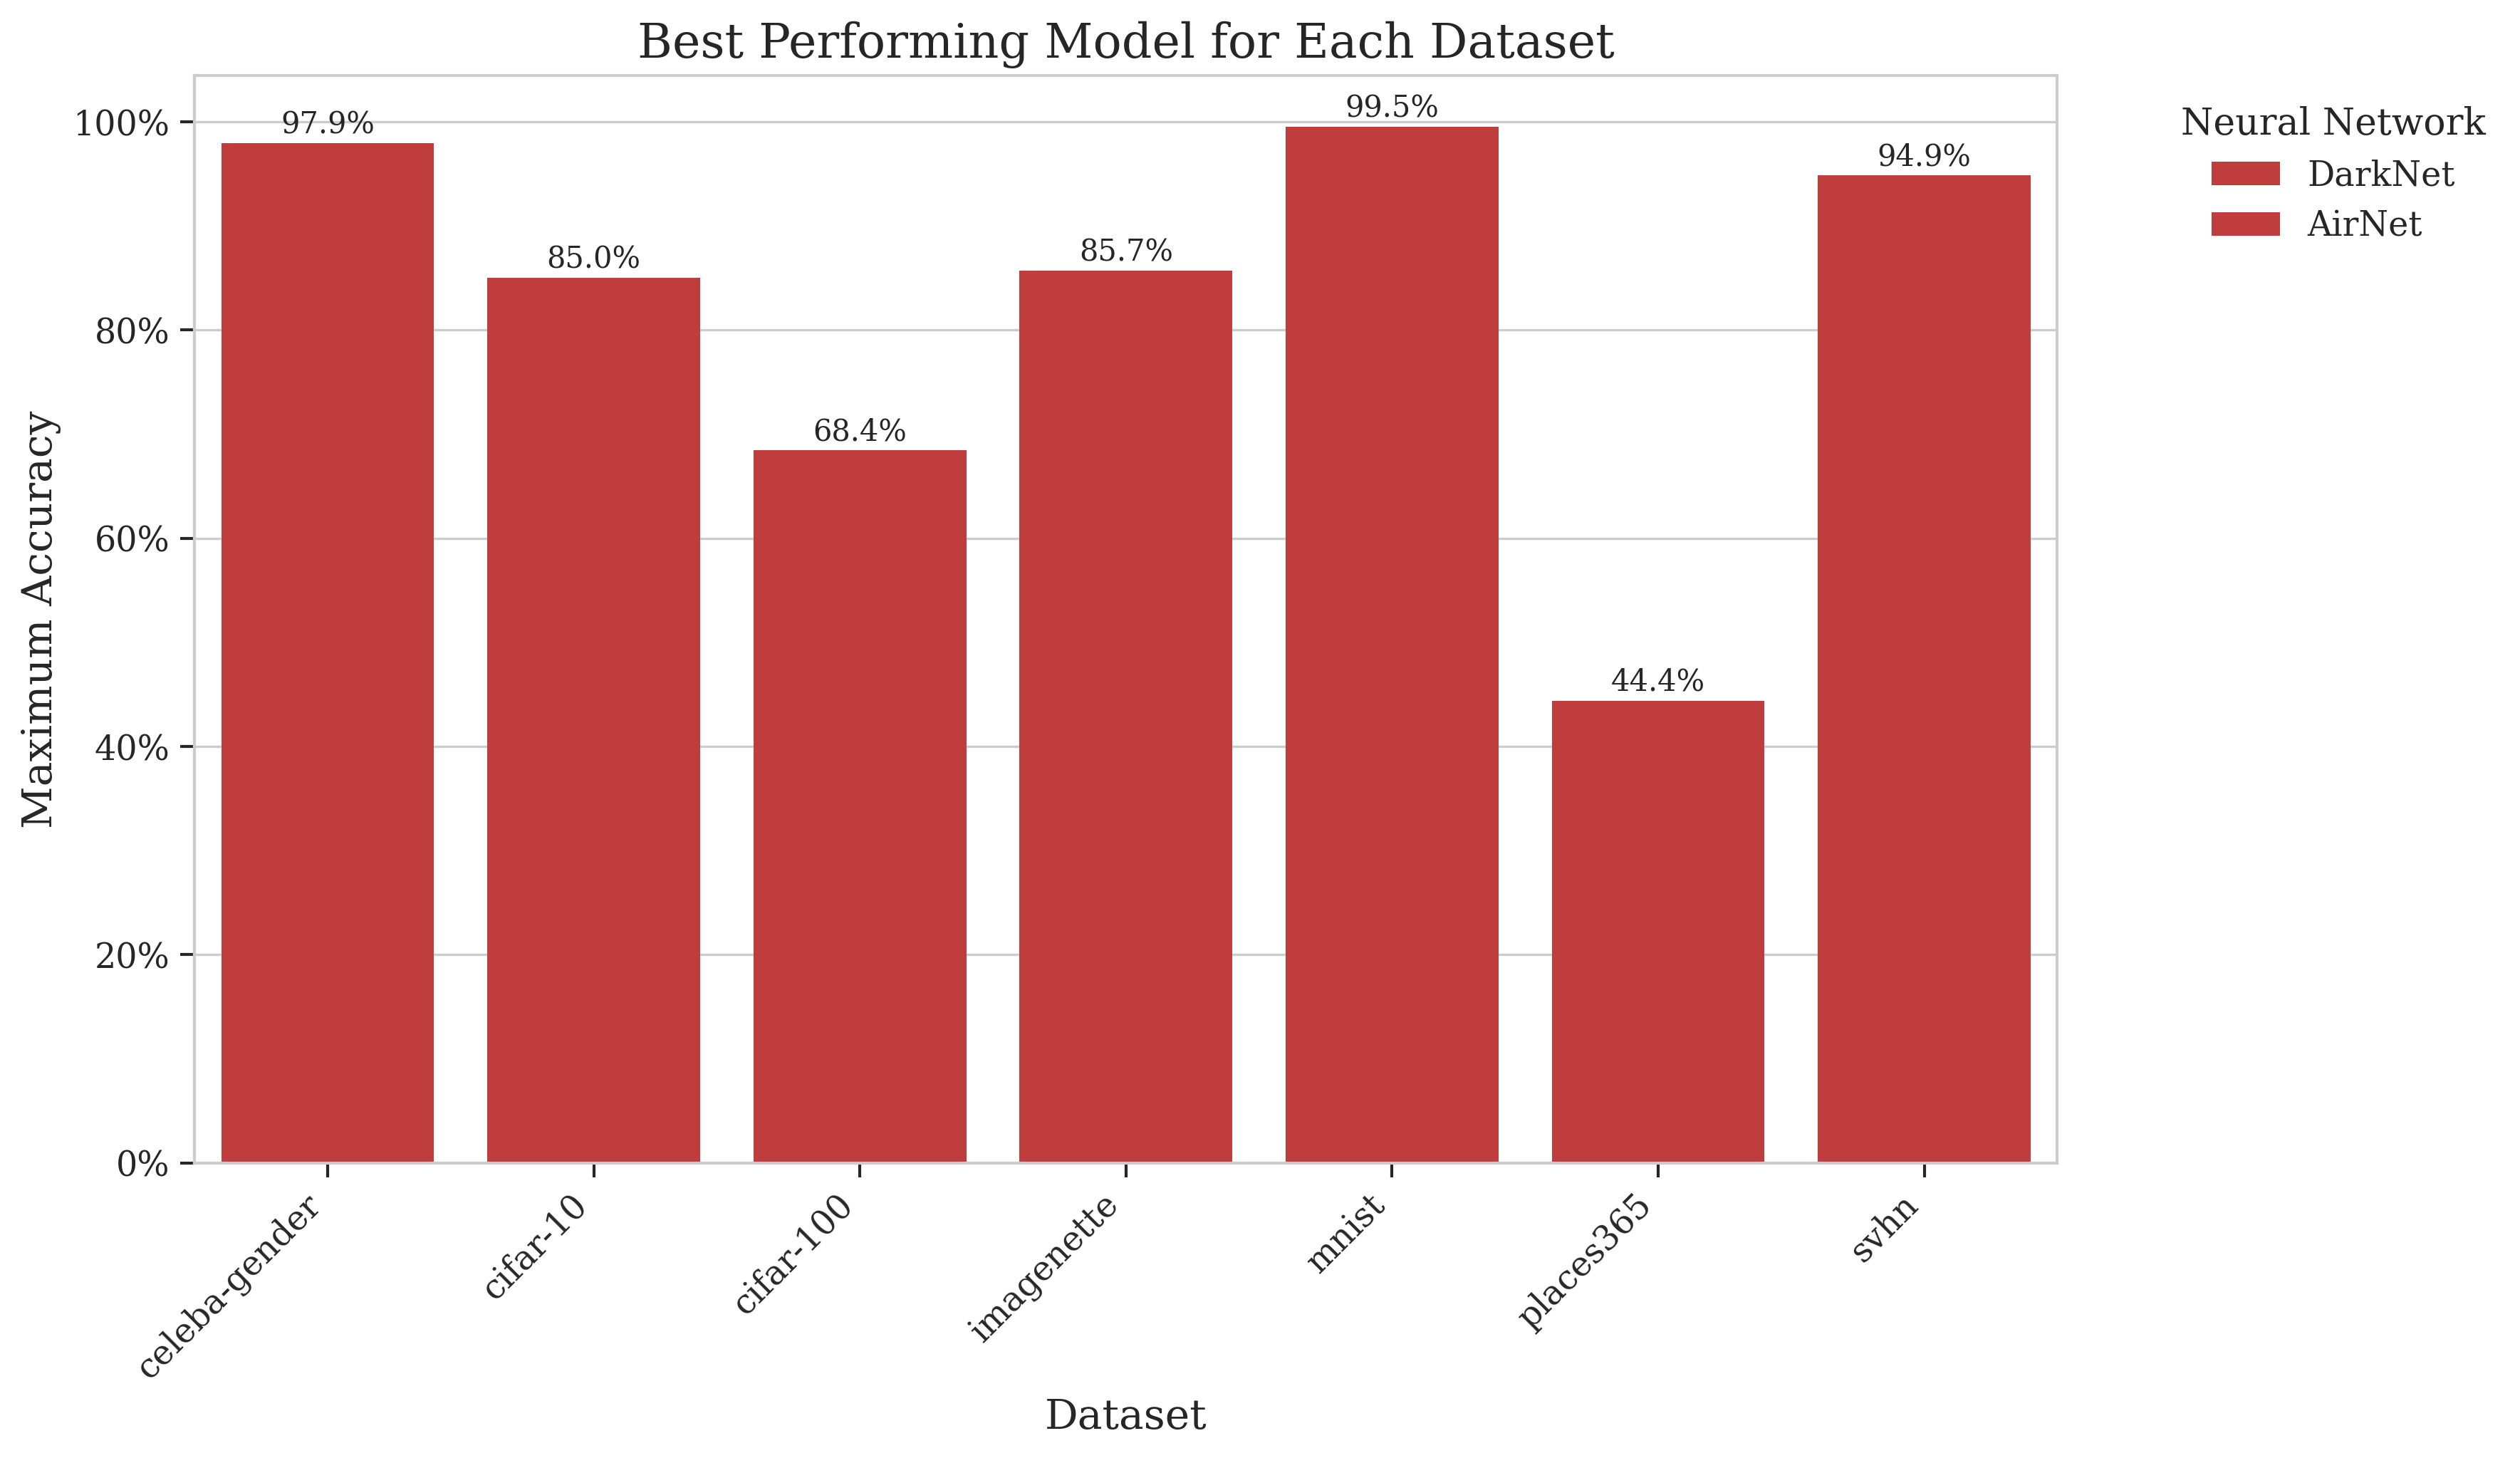

In [10]:
## Visualization 7: Best Model for Each Dataset

def create_best_model_visualization():
    print("Creating best model visualization...")
    best_models = filtered_df.loc[filtered_df.groupby('dataset')['accuracy'].idxmax()]
    
    plt.figure(figsize=(12, 7))
    ax = sns.barplot(
        x='dataset', 
        y='accuracy', 
        hue='nn', 
        data=best_models,
        palette=[model_colors.get(m) for m in best_models['nn']]
    )
    
    plt.title('Best Performing Model for Each Dataset', fontsize=16)
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel('Maximum Accuracy', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage formatting to y-axis
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    
    # Add value labels
    for i, row in enumerate(best_models.itertuples()):
        ax.text(i, row.accuracy + 0.01, f"{row.accuracy:.1%}", ha='center', fontsize=10)
    
    # Move the legend outside the graph
    plt.legend(
        title='Neural Network', 
        bbox_to_anchor=(1.05, 1), 
        loc='upper left'
    )
    plt.tight_layout()
    plt.savefig('report_figures/best_models.png')
    
    # Display the plot in the notebook
    plt.show()

# Run the function to create and display the visualization
create_best_model_visualization()


Creating all models performance visualization...


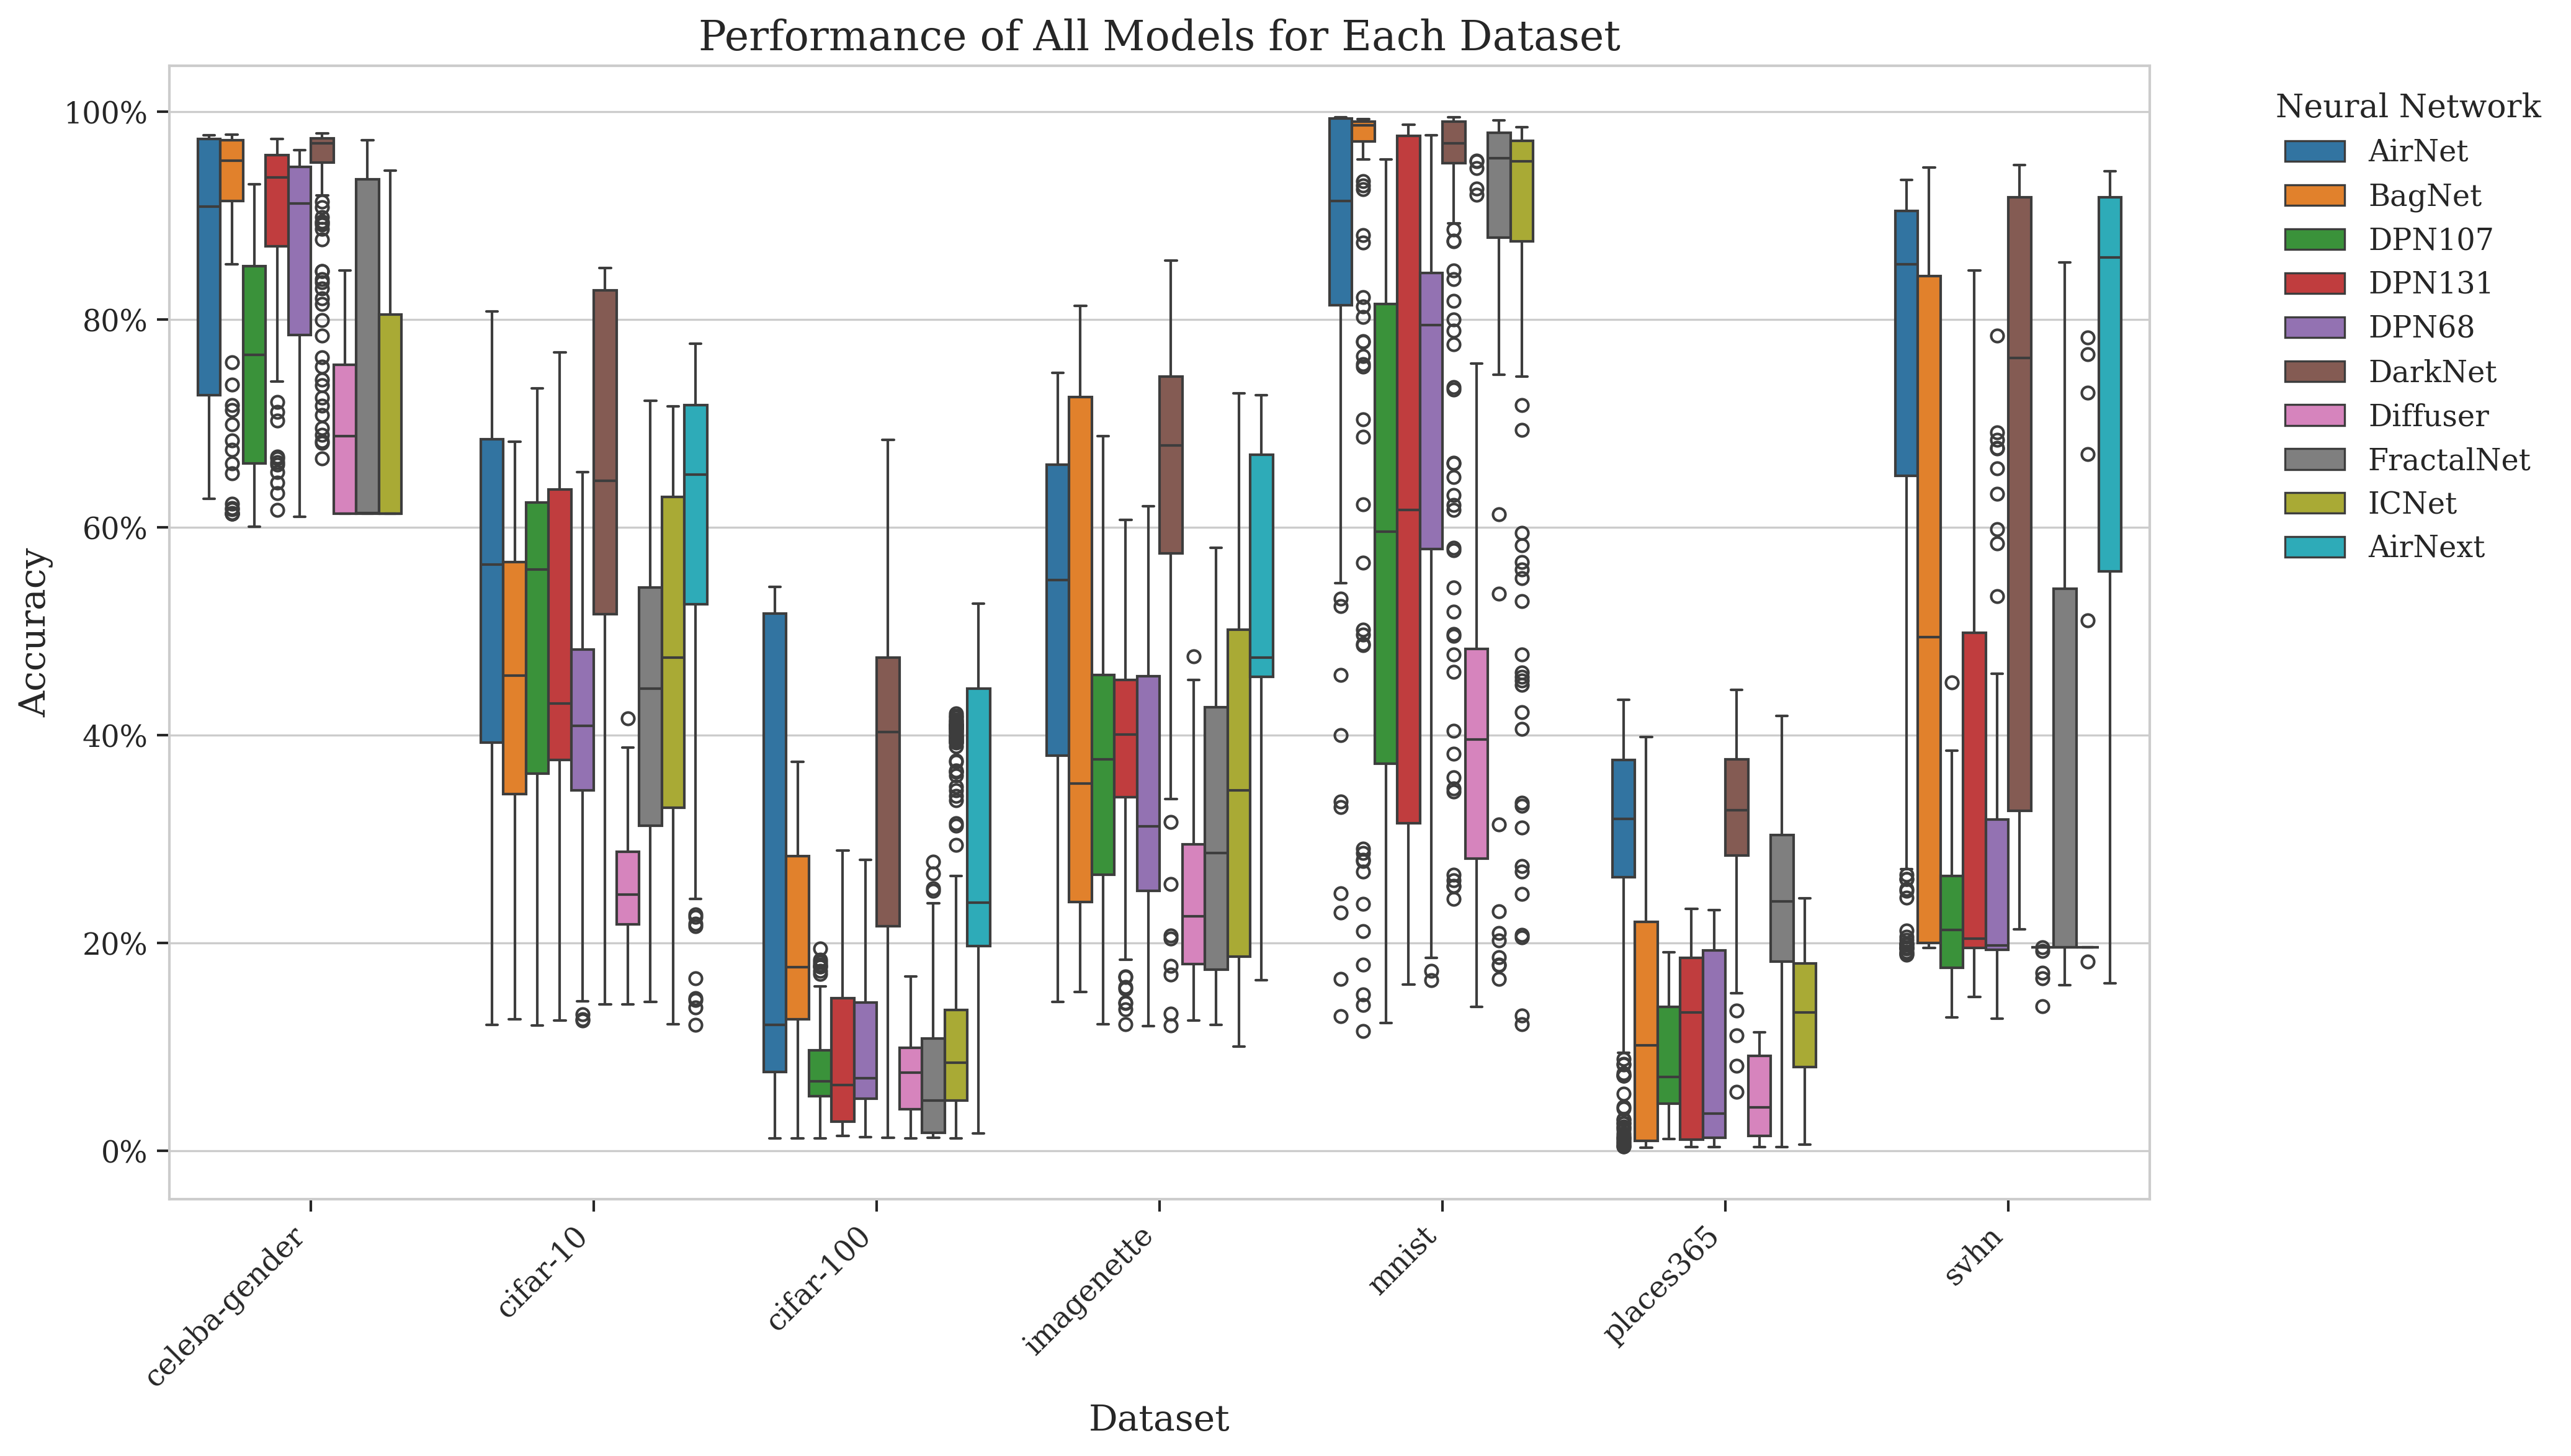

In [11]:

## Visualization 8: All Models Performance for Each Dataset

def create_all_models_performance_visualization():
    print("Creating all models performance visualization...")
    
    plt.figure(figsize=(14, 8))
    ax = sns.boxplot(
        x='dataset', 
        y='accuracy', 
        hue='nn', 
        data=filtered_df,
        palette=[model_colors.get(m) for m in relevant_models]
    )
    
    plt.title('Performance of All Models for Each Dataset', fontsize=16)
    plt.xlabel('Dataset', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage formatting to y-axis
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    
    plt.legend(title='Neural Network', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig('report_figures/all_models_performance.png')
    
    # Display the plot in the notebook
    plt.show()

# Run the function to create and display the visualization
create_all_models_performance_visualization()